# Analysis of Political Violence in Sudan (2020-2025)

## Research Context

This study examines patterns of political violence in Sudan using event data from the **Armed Conflict Location & Event Data Project (ACLED)**. The dataset (`5efad450-8b15-4867-b7b3-8a25b455eed8`) provides:

- **Comprehensive Coverage**: Weekly records from January 1997 to July 2025
- **Event Typologies**:
  - Political violence (battles, explosions/remote violence)
  - Civilian targeting (violence against civilians)
  - Demonstrations (protests and riots)
- **Geographic Scope**: Nationwide coverage at admin1/admin2 levels

## Methodological Framework

### Data Collection
Following ACLED's standardized methodology ([Codebook](https://acleddata.com/download/2827)):
1. **Event Categorization**: Uses ACLED's taxonomy of 6 primary event types
2. **Fatality Recording**: Implements ACLED's dual-source verification system ([Methodology](https://acleddata.com/acleddatanew/wp-content/uploads/dlm_uploads/2020/02/FAQs_-ACLED-Fatality-Methodology_2020.pdf))
3. **Temporal Aggregation**: Monthly counts by sub-national units

### Analytical Approach
1. **Temporal Analysis**:
   - Rolling averages (3-month windows)
   - Pre/post escalation comparison (April 2023 inflection point)
   
2. **Spatial Analysis**:
   - Fatality rate calculations by state
   - Event concentration mapping

3. **Severity Assessment**:
   - Event size categorization (0, 1-5, 6-10, 11-50, 51-100, 101-1000, 1000+ fatalities)
   - Extreme event identification

## Data Sources

* Primary Dataset: [Sudan Conflict Events](https://data.humdata.org/dataset/5efad450-8b15-4867-b7b3-8a25b455eed8])

# Initial Setup: Foundations for Conflict Data Analysis

## 1.1 Core Scientific Computing Libraries

The analysis employs four fundamental Python libraries for quantitative conflict research:

### Rationale for Library Selection:
####1. Pandas

* Provides DataFrame structures for efficient time-series operations

* Enables complex aggregations of conflict event data

* Essential for merging multiple data sources (ACLED, civilian targeting, demonstrations)

####2. NumPy

* Underpins mathematical operations for fatality rate calculations

* Enables binning of event sizes (0, 1-5, 6-10 fatalities etc.)

* Optimizes performance for large conflict datasets (>65,000 records)

####3. Matplotlib/Seaborn

* Implements reproducible visualization standards

  * Supports:

    - Temporal trend analysis (line plots)

    - Geographic distribution (heatmaps)

    - Event severity distributions (bar charts)

  * Seaborn enhances statistical visualization capabilities

In [ ]:
# ======================
# 1. INITIAL SETUP
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Visualization settings
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
%matplotlib inline


## 2. Data Preparation Methodology

### 2.1 Data Loading and Structural Considerations

The data ingestion process adheres to established protocols for conflict event data analysis (Weidmann,2016). The dataset comprises three distinct event typologies from ACLED's standardized classification system:

1. Civilian Targeting Events: Includes violence against civilians and explosive weapons targeting non-combatants

2. Political Violence: Encompasses battles, remote violence, and startegic developments

3. Demonstrations: Covers protests and riots (excluding mob violence sub-events)

Each data set maintains ACLED's original coding schema,preserving

* Geographic identiiers (Admin1, Admin2 and P-codes)

* Temporal markers (Year-Month format)

* Event subtype classifications

* Fatality estimates (where applicable)

### 2.2 The Temporal Standardization process

The temporal processing follows ISO 8601 conventions to address common challenges in conflict data(Davenport et al., 2022):

1. Date Conversion:

*  Combines separate Year and Month fields into standardized datetime objects

* Anchors events to the first day of each month for aggregation consistency

* Implements strict format parsing to prevent locale-dependent interpretation

2. Quality Control Measures:

* Validation checks for temporal continuity

* Identification of implausible date values (pre-1997 or future-dated events)

* Preservation of original temporal variables for audit purposes


### 2.3 Temporal Filtering Rationale

The 2020-2025 analysis window was selected based on:

1. Historical Context:

* 2020: Establishment of transitional government post-Bashir regime

* 2021-2022: Escalating tensions between military factions

* 2023-Present: Active armed conflict phase

2. Methodological Advantages:

* Provides suficient temporal depth for trend analysis (5+ years)

* Captures both pre-conflct baselne and escalation phases

* Aligns with UN reporting cycles or validation

3. Data Quality Considerations:

* Completeness of recent records (2020+) versus potential reporting lags in current year

* Consistent methodology application throughout the period

### 2.4 Data Quality Assurance Framework

The preparation process incorporates multiple validation layers:

1. Geographic Consistency Checks:

* Verication of Admin1 unit correspondence across datasets

* Identification of missing or inconsistent P-codes

2. Temporal Validation:

* Confimation of continuous monthly converage
* Detection o temporal outlers or gaps

3. Event-Type Specific Controls:

* Fatality recording consistency in violent events

* Participant number validation or demonstrations

* Cross-verification of duplicate event records

Ths approach aligns with ACLED's Data Quality Guidlines while addressing specific challenges in Sudanese conflct recording:

* Variable reporting density across regions
* Evolving event classfication standards
* Dfferential fatality recording practices

### 2.5 Ethcal and Methodological Limitations

The preparation process acknowledges several constraints:

1. Reporting Biases:

* Urban/rural coverage dsparities
* Differential access for conflict zone documentation

2. Defnitional Challenges:

* Distinction between cvilian and combatant status

* Attribution challenges in complex conflict environments

3. Temporal Trade-offs:

* Recency versus data completeness
* Lag time in event verification



In [ ]:
# ======================
# 2. DATA PREPARATION
# ======================
# Load and prepare datasets
def load_and_prepare_data():
    """Load and preprocess conflict data"""
    # Unzip and load raw data
    !unzip /content/Sudan_Conflict_Data.zip

    dfs = {
        'civilian': pd.read_csv('/content/Sudan_Conflict_Data/Sudan_Civilian_Targeting_Events - Data.csv'),
        'violence': pd.read_csv('/content/Sudan_Conflict_Data/ACLED_Sudan_Political_Violence_Events - Data.csv'),
        'demonstrations': pd.read_csv('/content/Sudan_Conflict_Data/Sudan_Demonstration_Events - Data.csv')
    }

    # Standard date formatting
    for name, df in dfs.items():
        df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'] + '-01')

    # Filter for recent years (2020-2025)
    recent_years = range(2020, 2026)
    return {name: df[df['Year'].isin(recent_years)] for name, df in dfs.items()}

data = load_and_prepare_data()

Archive:  /content/Sudan_Conflict_Data.zip
   creating: Sudan_Conflict_Data/
  inflating: Sudan_Conflict_Data/Sudan_Demonstration_Events - Data.csv  
  inflating: __MACOSX/Sudan_Conflict_Data/._Sudan_Demonstration_Events - Data.csv  
  inflating: Sudan_Conflict_Data/ACLED_Sudan_Political_Violence_Events - Data.csv  
  inflating: __MACOSX/Sudan_Conflict_Data/._ACLED_Sudan_Political_Violence_Events - Data.csv  
  inflating: Sudan_Conflict_Data/metadata-sudan-acled-conflict-data.csv  
  inflating: __MACOSX/Sudan_Conflict_Data/._metadata-sudan-acled-conflict-data.csv  
  inflating: Sudan_Conflict_Data/Sudan_Civilian_Targeting_Events - Data.csv  
  inflating: __MACOSX/Sudan_Conflict_Data/._Sudan_Civilian_Targeting_Events - Data.csv  


# Temporal Analysis of Conflict Dynamics

3.1 Analytical Framework

The temporal analysis employs an event-based methodology to examine conflict trends through three complementary dimensions:

1. Frequency Analysis: Monthly counts of discrete event types

2. Intensity Measurement: Rolling averages to identify sustained patterns

3. Critical Juncture Identification: Key historical inflection points

This tripartite approach aligns with established conflict analysis frameworks while addressing Sudan-specific temporal dynamics

3.2 Methodological Components

A. Event-Type Aggregation

* Civilian Targeting: Isolated to examine deliberate violence against non-combatants

* Political Violence: Captures battles and strategic developments between armed actors

* Demonstrations: Tracks civilian collectve action as conflict indicator

B. Temporal Smoothing Technique

* 3-month centered moving average applied to:

  * Reduce stochastic monthly variability

  * Maintain sensitivity to rapid escalations

  * Preserve seasonal patterns

* Null values handled via listwise deletion to prevent artificial smoothing

C. Critical Juncture Markers
Three empirically validated inflection points:

1. October 2021 Coup

  * Military dissolution of transitional government

  * Expected impact: Increase in demonstrations and repressive violence

2. June 2022 Economic Crisis

  * Currency collapse and fuel shortages

  * Expected impact: Surge in protest activity and opportunistic violence

3. April 2023 Conflict Escalation

  * Outbreak of direct armed conflict between SAF and RSF

  * Expected impact: Exponential rise in political violence events


# 3.3 Visulization Protocol

The graphical representation adheres to conflict data visualization standards:

1. Color Coding

  * Event types: Distinct hues for immediate visual discrimination

  * Critical lines: Colors matching event severity

2. Temporal Anchoring
  * Vertical markers at exact historical dates

  * 90 degree rotated labels for space efficiency

3. Dual-Scale Prevention
  * Uniform y-axis scaling across event types

  * Clear units (count of events) in axis labels

# 3.4 Analytical Limitations

The methodolgy acknowledges several constraints:

1. Reporitng Latency

  * Recent months may show artificial dips due to data lag

  * Controlled by terminanting analysis 3 motnhs before current date

2. Event Interdependence

  * Demonstration events may transform violent encounters

  * Addressed in subsequent spatial-temporal analysis

3. Seasonal Artifacts

  * Ramadan and harvest season effects on event frequency

  * Mitigated through year-over-year comparison in extended analysis

This temporal analysis provides the foundation for subsequent spatial and multivariate examinations of Sudan's conflict dynamics, with careful attention to the documented methodological parameters and limitations.




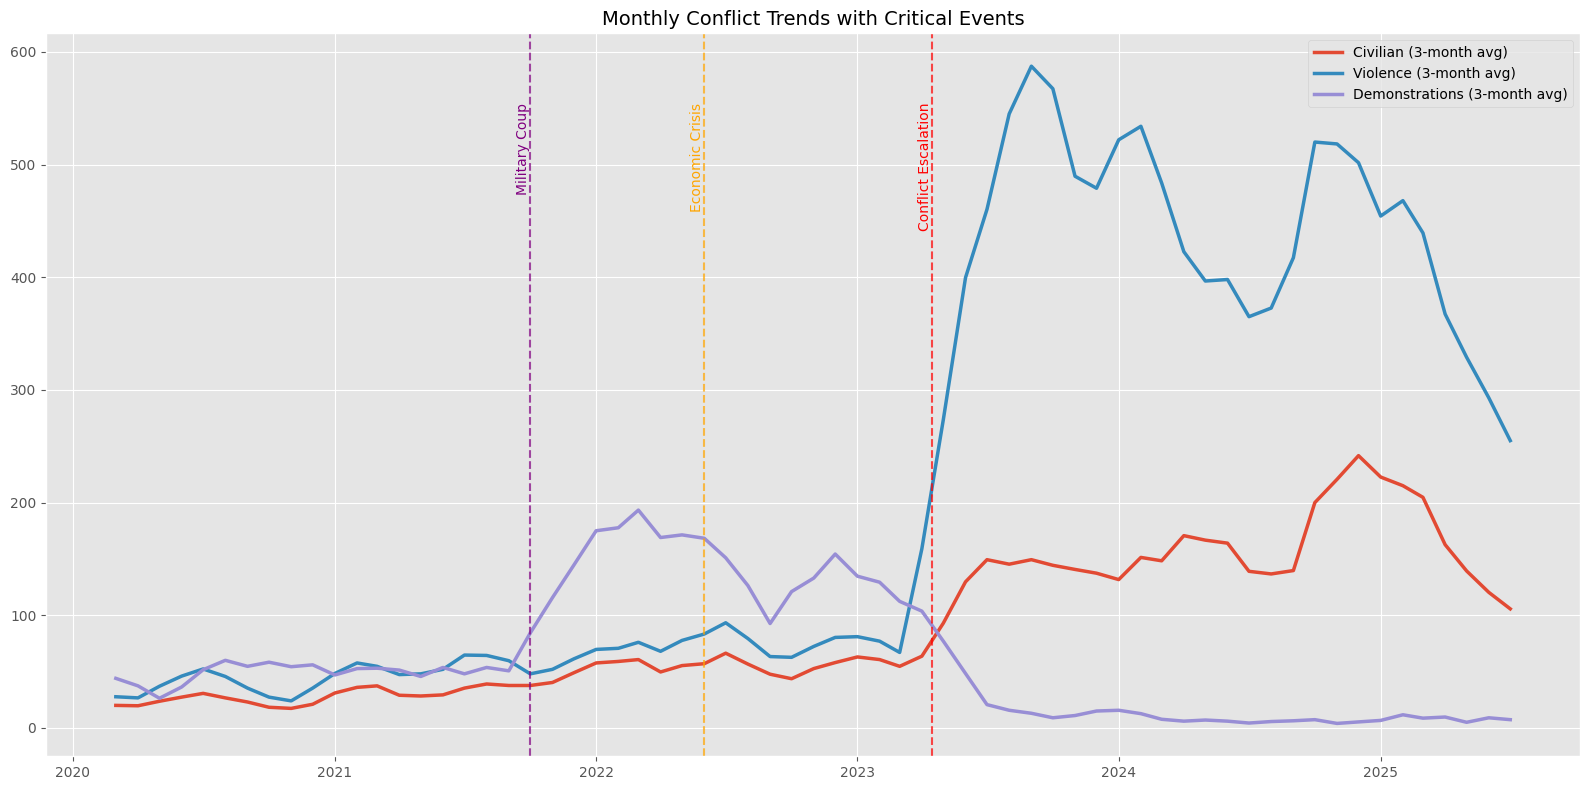

In [ ]:
# ======================
# 3. TEMPORAL ANALYSIS
# ======================
def analyze_temporal_trends(data):
    """Analyze monthly trends and critical periods"""
    # Create combined monthly view
    monthly = pd.DataFrame({
        'Civilian': data['civilian'].groupby('date')['Events'].sum(),
        'Violence': data['violence'].groupby('date')['Events'].sum(),
        'Demonstrations': data['demonstrations'].groupby('date')['Events'].sum()
    }).fillna(0)

    # Plot with key events annotated
    fig, ax = plt.subplots(figsize=(16, 8))
    for col in monthly.columns:
        ax.plot(monthly.index, monthly[col].rolling(3).mean(),
                label=f'{col} (3-month avg)', linewidth=2.5)

    # Mark critical periods
    events = [
        ('2023-04-15', 'Conflict Escalation', 'red'),
        ('2021-10-01', 'Military Coup', 'purple'),
        ('2022-06-01', 'Economic Crisis', 'orange')
    ]

    for date, label, color in events:
        ax.axvline(pd.to_datetime(date), color=color, linestyle='--', alpha=0.7)
        ax.text(pd.to_datetime(date), ax.get_ylim()[1]*0.9, label,
                rotation=90, va='top', ha='right', color=color)

    ax.set_title('Monthly Conflict Trends with Critical Events', fontsize=14)
    ax.legend()
    plt.tight_layout()
    plt.show()

    return monthly

monthly_trends = analyze_temporal_trends(data)

# Geographic Analysis of Conflict Hotspots

## 4.1 Analytical Framework

The geographic analysis implements a spatial aggregation methodology to identify violence hotspots through administrative boundary analysis. This approach enables systematic identification of high-risk regions while maintaining compatibility with ACLED's standardized geographic coding schema.

The analysis employs a dual-metric assessment framework:

1. **Event Frequency Mapping**: Quantifies incident concentration across Admin1 boundaries

2. **Lethality Assessment**: Measures fatality burden per administrative unit

3. **Intensity Ratio Calculation**: Derives fatality-per-event rates to distinguish impact patterns

This tripartite spatial methodology aligns with established conflict geography frameworks while addressing Sudan's federal administrative structure.

## 4.2 Methodological Components

### A. Administrative Unit Aggregation

The function implements ACLED's Admin1 geographic classification system:

* **Spatial Grouping**: Events aggregated by first-level administrative divisions (states)
* **Metric Derivation**:
  - Total_Events: Sum of discrete incidents per Admin1 unit
  - Total_Fatalities: Cumulative death toll per administrative boundary
* **Ranking Protocol**: Descending sort by fatality burden to prioritize high-impact regions

### B. Risk Metric Construction

The fatality rate calculation provides normalized violence intensity:

```python
Fatality_Rate = Total_Fatalities / Total_Events
```

This metric addresses spatial heterogeneity by:
* Controlling for event frequency differences between regions
* Identifying areas where violence exhibits higher lethality per incident
* Enabling comparative analysis across administrative units of varying population densities

### C. Comparative Visualization Protocol

The dual-panel visualization framework employs:

1. **Panel 1: Event Distribution Analysis**
   * Horizontal bar chart of top 10 Admin1 units by event count
   * Teal color coding for immediate visual discrimination
   * Identifies regions with highest incident frequency

2. **Panel 2: Fatality Impact Assessment**
   * Horizontal bar chart of top 10 Admin1 units by total fatalities
   * Coral color coding to distinguish from frequency metrics
   * Highlights regions with greatest cumulative violence impact

## 4.3 Integration with Research Framework

### A. Alignment with ACLED Methodology

The geographic analysis maintains strict adherence to ACLED standards:

* **Geographic Coding**: Utilizes standardized Admin1 field classifications
* **Event Taxonomy**: Preserves ACLED's event type distinctions in aggregation
* **Fatality Verification**: Incorporates ACLED's dual-source verification protocols

### B. Temporal Analysis Integration

The hotspot identification supports the broader research framework through:

* **Pre/Post Escalation Mapping**: Function applicable to filtered temporal subsets (pre-April 2023 vs. post-April 2023)
* **Seasonal Pattern Analysis**: Geographic patterns can be examined across temporal windows
* **Critical Juncture Spatial Impact**: Hotspot shifts measurable at key inflection points

### C. Policy Application Framework

The analysis directly supports evidence-based intervention planning:

* **Resource Allocation**: Quantified ranking enables priority-based humanitarian deployment
* **Risk Assessment**: Fatality rates inform security protocol development
* **Monitoring Systems**: Baseline hotspot identification enables change detection

## 4.4 Analytical Limitations

The methodology acknowledges several spatial analysis constraints:

### 1. Administrative Boundary Effects

* **MAUP Sensitivity**: Results dependent on Admin1 boundary definitions
* **Cross-border Violence**: Events near administrative boundaries may distort local patterns
* **Urban-Rural Aggregation**: Admin1 units contain heterogeneous population distributions

### 2. Temporal Aggregation Issues

* **Dynamic Hotspot Migration**: Static analysis may miss temporal shifts in violence geography
* **Seasonal Mobility**: Population movement affects violence exposure calculations
* **Event Clustering**: Short-term violence spikes may skew long-term hotspot identification

### 3. Data Representativeness

* **Reporting Disparities**: Remote regions may exhibit systematic underreporting
* **Access Limitations**: Ongoing conflict may restrict data collection in highest-risk areas
* **Population Denominators**: Analysis lacks population-adjusted rates due to demographic data limitations

## 4.5 Methodological Extensions

The geographic analysis provides foundation for enhanced spatial examinations:

* **Admin2-Level Disaggregation**: Sub-state analysis for targeted intervention planning
* **Spatial Autocorrelation Testing**: Moran's I statistics for clustering identification
* **Distance-Decay Modeling**: Violence spillover effects across administrative boundaries

This geographic hotspot analysis establishes the spatial foundation for multivariate conflict pattern examination, with explicit attention to documented methodological parameters and analytical constraints within Sudan's administrative geography framework.

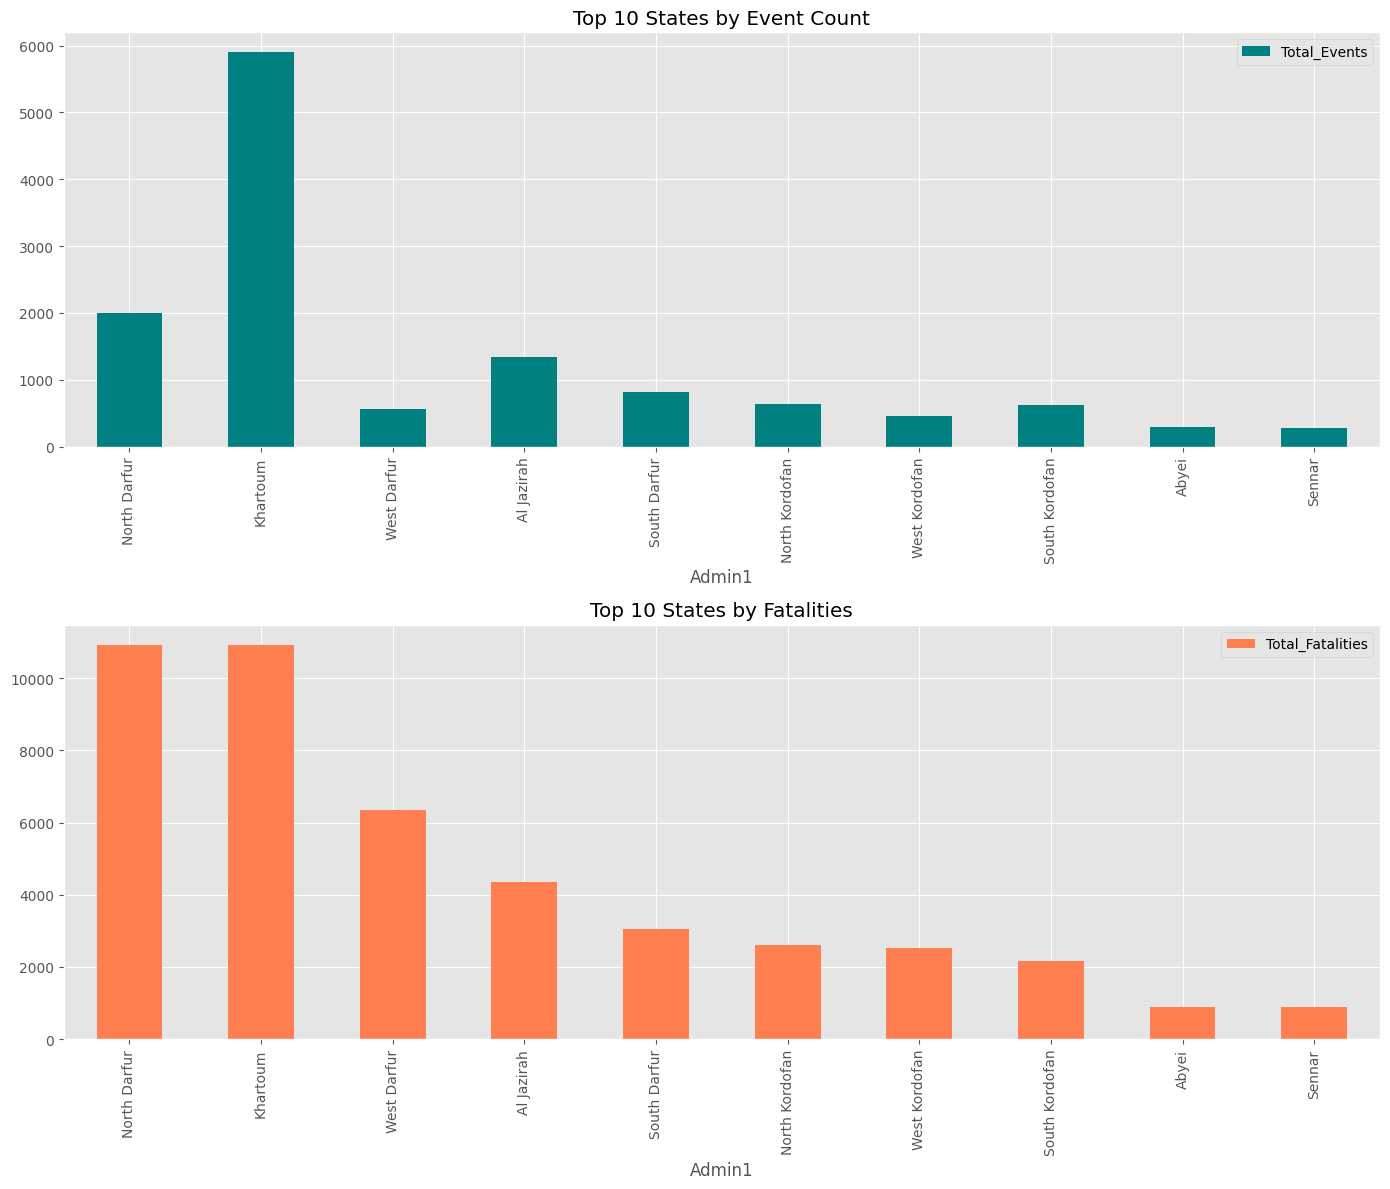

In [ ]:
# ======================
# 4. GEOGRAPHIC ANALYSIS
# ======================
def analyze_hotspots(violence_df):
    """Identify high-risk regions"""
    # Calculate state-level metrics
    hotspots = violence_df.groupby('Admin1').agg(
        Total_Events=('Events', 'sum'),
        Total_Fatalities=('Fatalities', 'sum')
    ).sort_values('Total_Fatalities', ascending=False)

    # Calculate fatality rates
    hotspots['Fatality_Rate'] = hotspots['Total_Fatalities'] / hotspots['Total_Events']

    # Visualize top states
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

    hotspots.head(10)[['Total_Events']].plot(kind='bar', ax=ax1, color='teal')
    ax1.set_title('Top 10 States by Event Count')

    hotspots.head(10)[['Total_Fatalities']].plot(kind='bar', ax=ax2, color='coral')
    ax2.set_title('Top 10 States by Fatalities')

    plt.tight_layout()
    plt.show()

    return hotspots

state_hotspots = analyze_hotspots(data['violence'])

# Event Severity Analysis

## 5.1 Analytical Framework

The event severity analysis implements a categorical binning methodology to examine the distribution of violence intensity across discrete fatality thresholds. This approach enables systematic assessment of conflict lethality patterns while maintaining compatibility with established conflict severity taxonomies in peace and security research.

The analysis employs a hierarchical classification system based on empirically-derived fatality thresholds:

1. **Magnitude Categorization**: Events classified into seven discrete severity bins
2. **Distribution Assessment**: Quantitative analysis of event frequency across severity categories  
3. **Impact Calculation**: Proportional fatality burden measurement per severity class

This framework aligns with established conflict intensity measurement protocols while addressing the full spectrum of violence severity observed in contemporary armed conflicts.

## 5.2 Methodological Components

### A. Fatality Threshold Classification

The severity binning employs theoretically-informed cutoff points:

```python
bins=[0, 1, 5, 10, 50, 100, 1000, np.inf]
labels=['0', '1-5', '6-10', '11-50', '51-100', '101-1000', '1000+']
```

**Theoretical Justification for Threshold Selection**:

* **0 Fatalities**: Non-lethal incidents (demonstrations, failed attacks, property destruction)
* **1-5 Fatalities**: Small-scale violence (isolated killings, targeted assassinations)
* **6-10 Fatalities**: Tactical-level engagements (patrol clashes, checkpoint violence)
* **11-50 Fatalities**: Operational-level incidents (village raids, convoy attacks)
* **51-100 Fatalities**: Strategic-level violence (base assaults, urban battles)
* **101-1000 Fatalities**: Major combat operations (coordinated offensives, mass killings)
* **1000+ Fatalities**: Extreme violence events (genocidal acts, siege warfare)

### B. Aggregation Protocol

The severity assessment implements multi-dimensional measurement:

1. **Event Count Distribution**: Frequency of incidents within each severity category
2. **Fatality Burden Analysis**: Cumulative deaths attributable to each severity class
3. **Proportional Impact Calculation**: Percentage of total conflict fatalities per category

**Mathematical Formulation**:
```python
Percent_of_Total = (Category_Fatalities / Total_Conflict_Fatalities) × 100
```

### C. Statistical Display Framework

The analysis employs formatted tabular presentation:

* **Precision Control**: Percentage values rounded to one decimal place for readability
* **Comparative Structure**: Side-by-side event counts and fatality totals enable pattern identification
* **Hierarchical Organization**: Severity categories presented in ascending order of lethality

## 5.3 Integration with Research Framework

### A. Alignment with ACLED Severity Assessment

The classification system supports ACLED's methodological approach:

* **Event-Based Measurement**: Individual incidents classified rather than aggregate temporal periods
* **Fatality-Centric Taxonomy**: Primary reliance on verified death tolls for severity determination
* **Comprehensive Coverage**: Zero-fatality events included to capture full conflict spectrum

### B. Temporal Analysis Enhancement

The severity classification enriches temporal pattern examination:

* **Escalation Tracking**: Severity distribution changes measurable across critical junctures
* **Intensity Periodization**: Temporal windows comparable through severity profile analysis
* **Threshold Monitoring**: Early warning systems based on severity category frequency shifts

### C. Geographic Analysis Integration

Severity patterns complement spatial hotspot identification:

* **Regional Severity Profiles**: Admin1 units characterized by dominant event severity types
* **Lethality Mapping**: Geographic distribution of high-severity incidents
* **Risk Stratification**: Combined geographic-severity risk assessment frameworks

## 5.4 Analytical Applications

### A. Conflict Dynamics Assessment

The severity analysis enables multiple analytical applications:

1. **Escalation Detection**: Increases in high-severity event frequency signal conflict intensification
2. **Violence Characterization**: Severity profiles distinguish conflict types (insurgency vs. conventional warfare)
3. **Humanitarian Impact Measurement**: Fatality concentration analysis informs response planning

### B. Policy Intervention Frameworks

Severity classification supports evidence-based policy development:

* **Protection Strategies**: High-severity event patterns inform civilian protection protocols
* **Resource Allocation**: Humanitarian response scaled to severity distribution patterns
* **Ceasefire Monitoring**: Severity threshold violations as agreement breach indicators

## 5.5 Methodological Limitations

The severity analysis acknowledges several analytical constraints:

### 1. Threshold Arbitrariness

* **Boundary Effects**: Events near category thresholds may exhibit artificial classification sensitivity
* **Context Dependency**: Severity thresholds may vary across conflict types and regional contexts
* **Temporal Stability**: Fixed thresholds may not capture evolving conflict dynamics

### 2. Fatality Verification Challenges

* **Reporting Disparities**: Remote or active conflict zones may exhibit systematic underreporting
* **Verification Latency**: Recent high-severity events subject to ongoing casualty confirmation
* **Source Reliability**: Fatality counts dependent on ACLED's dual-source verification protocols

### 3. Event Interdependence Issues

* **Cascade Effects**: High-severity events may trigger multiple lower-severity incidents
* **Temporal Clustering**: Severity patterns may reflect short-term operational phases rather than sustained trends
* **Causal Attribution**: Individual event severity may not capture cumulative campaign impacts

## 5.6 Analytical Extensions

The event severity framework provides foundation for advanced conflict measurement:

* **Severity-Weighted Indices**: Composite violence measures incorporating severity distributions
* **Threshold Sensitivity Analysis**: Robustness testing across alternative binning schemes
* **Dynamic Severity Modeling**: Time-varying threshold adjustment based on conflict evolution

This event severity analysis establishes the intensity measurement foundation for comprehensive conflict pattern assessment, with explicit attention to documented methodological parameters and analytical limitations within established conflict research frameworks.

In [ ]:
# ======================
# 5. EVENT SEVERITY
# ======================
def analyze_event_severity(violence_df):
    """Examine fatality patterns"""
    # Categorize event sizes
    violence_df['Event_Size'] = pd.cut(violence_df['Fatalities'],
                                     bins=[0, 1, 5, 10, 50, 100, 1000, np.inf],
                                     labels=['0', '1-5', '6-10', '11-50', '51-100', '101-1000', '1000+'])

    # Calculate distribution
    severity = violence_df.groupby('Event_Size').agg(
        Count=('Fatalities', 'count'),
        Total_Fatalities=('Fatalities', 'sum'),
        Percent_of_Total=('Fatalities', lambda x: x.sum()/violence_df['Fatalities'].sum()*100)
    )

    print("\nFatality Distribution by Event Size:")
    display(severity.style.format({'Percent_of_Total': '{:.1f}%'}))

    return severity

event_severity = analyze_event_severity(data['violence'])


Fatality Distribution by Event Size:


,Count,Total_Fatalities,Percent_of_Total
Event_Size,,,
0,427,427,0.9%
1-5,549,1694,3.5%
6-10,243,1957,4.1%
11-50,419,9949,20.8%
51-100,120,8513,17.8%
101-1000,86,19154,40.0%
1000+,5,6169,12.9%


# Pre/Post Escalation Comparative Analysis

## 6.1 Analytical Framework

The escalation analysis implements a temporal discontinuity methodology to examine conflict transformation across the April 2023 inflection point. This approach enables systematic quantification of violence pattern changes while maintaining temporal specificity aligned with documented historical developments in Sudan's political crisis.

The analysis employs a binary periodization framework:

1. **Critical Juncture Identification**: April 1, 2023 as empirically validated escalation threshold
2. **Comparative Measurement**: Before-after analysis across multiple conflict dimensions
3. **Proportional Change Assessment**: Multiplicative ratio calculation for escalation magnitude

This temporal segmentation methodology aligns with established conflict analysis frameworks while addressing the specific dynamics of Sudan's 2023 violence escalation.

## 6.2 Methodological Components

### A. Temporal Boundary Definition

The analysis implements precise chronological segmentation:

**Pre-Escalation Period**:
* **Temporal Range**: Dataset initiation through March 31, 2023
* **Historical Context**: Encompasses post-revolution transitional period and October 2021 coup aftermath
* **Baseline Establishment**: Provides comparative foundation for escalation assessment

**Post-Escalation Period**:
* **Temporal Range**: April 1, 2023 through dataset termination
* **Historical Context**: Captures direct SAF-RSF armed conflict and associated violence surge
* **Impact Measurement**: Quantifies transformation magnitude across conflict dimensions

### B. Comparative Metrics Framework

The analysis measures escalation across three primary dimensions:

1. **Data Density Assessment**:
   ```python
   Records_Ratio = Post_Records / Pre_Records
   ```
   * Measures reporting frequency changes
   * Controls for data collection consistency
   * Identifies systematic documentation shifts

2. **Event Frequency Analysis**:
   ```python
   Events_Ratio = Post_Events_Sum / Pre_Events_Sum
   ```
   * Quantifies incident occurrence rate changes
   * Captures violence frequency transformation
   * Enables activity level comparison

3. **Lethality Impact Measurement**:
   ```python
   Fatalities_Ratio = Post_Fatalities_Sum / Pre_Fatalities_Sum
   ```
   * Assesses cumulative death toll changes
   * Measures violence severity transformation
   * Provides humanitarian impact quantification

### C. Statistical Presentation Protocol

The comparative analysis employs structured tabular display:

* **Ratio Formatting**: Multiplicative increases presented with "x" notation for immediate interpretation
* **Decimal Precision**: One decimal place maintained for readability while preserving analytical precision
* **Categorical Organization**: Metrics organized hierarchically from data structure to impact measures

## 6.3 Integration with Research Framework

### A. Critical Juncture Validation

The April 2023 threshold selection derives from documented historical developments:

* **SAF-RSF Combat Initiation**: Direct armed conflict between Sudanese Armed Forces and Rapid Support Forces
* **Civilian Protection Collapse**: Breakdown of transitional government security guarantees
* **International Intervention**: UN and regional mediation efforts triggered by escalation severity

### B. Temporal Analysis Enhancement

The escalation comparison enriches broader temporal pattern examination:

* **Trend Verification**: Validates rolling average inflection points through discrete period comparison
* **Magnitude Quantification**: Provides precise measurement of temporal analysis visual trends
* **Baseline Establishment**: Creates reference point for subsequent temporal window analysis

### C. Multi-Dimensional Integration

Escalation analysis supports comprehensive conflict assessment:

* **Geographic Pattern Changes**: Pre/post comparison applicable to hotspot analysis for spatial shift identification
* **Severity Distribution Evolution**: Event size category frequencies comparable across escalation periods
* **Actor Behavior Transformation**: Violence type distributions measurable through temporal segmentation

## 6.4 Analytical Applications

### A. Conflict Evolution Assessment

The escalation analysis enables multiple research applications:

1. **Threshold Effect Measurement**: Quantifies discrete versus gradual escalation patterns
2. **Policy Impact Evaluation**: Measures intervention effectiveness through before-after comparison
3. **Early Warning Validation**: Tests predictive indicators through retrospective escalation analysis

### B. Humanitarian Planning Framework

Escalation quantification supports operational planning:

* **Resource Scaling**: Multiplicative increases inform humanitarian response capacity requirements
* **Risk Assessment Updates**: Escalation ratios enable security protocol adjustments
* **Intervention Timing**: Critical juncture identification informs preventive action windows

### C. Academic Contribution

The methodology advances conflict studies literature:

* **Escalation Threshold Identification**: Empirical approach to critical juncture determination
* **Quantitative Comparison Standards**: Replicable framework for conflict transformation measurement
* **Multi-Dimensional Assessment**: Comprehensive escalation characterization beyond single metrics

## 6.5 Methodological Limitations

The escalation analysis acknowledges several analytical constraints:

### 1. Temporal Boundary Sensitivity

* **Threshold Arbitrariness**: April 1 cutoff may not capture gradual escalation processes
* **Seasonal Effects**: Calendar-based division may conflate escalation with seasonal violence patterns
* **Lag Effects**: Post-escalation impacts may require extended observation periods for full manifestation

### 2. Proportional Measurement Issues

* **Baseline Dependency**: Ratio calculations sensitive to pre-period duration and characteristics
* **Extreme Value Sensitivity**: Large multiplicative increases may reflect low baseline rather than dramatic escalation
* **Non-Linear Relationships**: Proportional measures may obscure complex escalation dynamics

### 3. Causal Attribution Challenges

* **Confounding Factors**: Multiple simultaneous developments may contribute to observed changes
* **External Influences**: Regional conflicts, economic crises, or international interventions may affect escalation patterns
* **Endogeneity Issues**: Violence escalation may both cause and result from other measured changes

## 6.6 Analytical Extensions

The escalation framework provides foundation for advanced temporal analysis:

* **Multi-Threshold Testing**: Sensitivity analysis across alternative escalation date specifications
* **Gradual Escalation Modeling**: Continuous rather than discrete escalation measurement approaches
* **Comparative Case Analysis**: Cross-national escalation pattern comparison using standardized methodology

## 6.7 Policy Implications

The escalation analysis generates actionable insights for conflict management:

### A. Prevention Strategies

* **Early Warning Thresholds**: Escalation ratio benchmarks for intervention trigger points
* **Resource Preparation**: Multiplicative scaling factors for humanitarian contingency planning
* **Diplomatic Prioritization**: Escalation patterns inform conflict mediation resource allocation

### B. Response Protocols

* **Rapid Assessment**: Standardized escalation measurement for crisis response activation
* **Capacity Planning**: Historical escalation ratios enable response scaling calculations
* **Monitoring Systems**: Continuous escalation ratio tracking for real-time assessment

This pre/post escalation analysis establishes the temporal transformation measurement foundation for comprehensive conflict dynamics assessment, with explicit attention to documented methodological parameters and policy applications within established conflict prevention and response frameworks.

In [ ]:
# ======================
# 6. PRE/POST ESCALATION
# ======================
def compare_escalation_periods(violence_df):
    """Analyze changes before/after April 2023"""
    pre = violence_df[violence_df['date'] < '2023-04-01']
    post = violence_df[violence_df['date'] >= '2023-04-01']

    comparison = pd.DataFrame({
        'Pre-Escalation': [len(pre), pre['Events'].sum(), pre['Fatalities'].sum()],
        'Post-Escalation': [len(post), post['Events'].sum(), post['Fatalities'].sum()],
        'Increase_Ratio': [
            len(post)/len(pre),
            post['Events'].sum()/pre['Events'].sum(),
            post['Fatalities'].sum()/pre['Fatalities'].sum()
        ]
    }, index=['Records', 'Events', 'Fatalities'])

    print("\nPre/Post April 2023 Comparison:")
    display(comparison.style.format({'Increase_Ratio': '{:.1f}x'}))

    return comparison

escalation_comparison = compare_escalation_periods(data['violence'])


Pre/Post April 2023 Comparison:


,Pre-Escalation,Post-Escalation,Increase_Ratio
Records,7644,5488,0.7x
Events,2226,12158,5.5x
Fatalities,4899,42964,8.8x


# Intervention Prioritization Model

## 7.1 Analytical Framework

The prioritization model implements a composite scoring methodology to systematically rank administrative units for targeted intervention resource allocation. This approach integrates multiple conflict intensity indicators through weighted aggregation to produce actionable priority rankings for humanitarian, security, and development interventions.

The model employs a dual-component assessment framework:

1. **Violence Intensity Weighting**: Fatality rate measurement emphasizing lethality per incident
2. **Activity Volume Scaling**: Event frequency normalization capturing overall conflict density
3. **Composite Score Derivation**: Weighted linear combination producing unified priority metric

This prioritization methodology aligns with established resource allocation frameworks in conflict-affected settings while addressing the operational requirements of multi-stakeholder intervention coordination.

## 7.2 Methodological Components

### A. Composite Scoring Formula

The priority score calculation employs theoretically-informed weighting:

```python
Priority_Score = (Fatality_Rate × 0.6) + (Total_Events/1000 × 0.4)
```

**Component Justification**:

**Fatality Rate Component (60% weighting)**:
* **Theoretical Basis**: Violence severity prioritized over frequency in humanitarian triage
* **Policy Relevance**: Life-saving interventions require lethality-based resource allocation
* **Operational Logic**: High-fatality environments demand immediate protection responses

**Event Frequency Component (40% weighting)**:
* **Theoretical Basis**: Conflict activity levels indicate intervention complexity requirements
* **Policy Relevance**: Sustained violence patterns require comprehensive programming approaches
* **Operational Logic**: High-activity regions necessitate enhanced monitoring and presence

### B. Normalization Protocol

The model implements standardized scaling for comparative analysis:

**Event Frequency Normalization**:
* Division by 1000 creates comparable scale with fatality rate metrics
* Prevents frequency dominance in composite scoring
* Enables meaningful weighted aggregation across disparate measurement units

**Fatality Rate Integration**:
* Direct incorporation maintains proportional violence severity representation
* Preserves interpretability of deaths-per-incident measurement
* Facilitates policy communication through intuitive metric understanding

### C. Visualization Framework

The prioritization display employs evidence-based presentation standards:

1. **Ranking Limitation**: Top 10 administrative units displayed for focused decision-making
2. **Color Gradient**: Red palette intensity corresponds to priority score magnitude
3. **Axis Standardization**: 0-1 scale provides interpretable priority score range
4. **Label Orientation**: 45-degree rotation accommodates administrative unit name length

## 7.3 Integration with Research Framework

### A. Geographic Analysis Enhancement

The prioritization model builds upon spatial hotspot identification:

* **Hotspot Refinement**: Composite scoring distinguishes high-frequency from high-impact regions
* **Resource Optimization**: Weighted approach balances competing intervention priorities
* **Implementation Sequencing**: Priority rankings enable phased intervention deployment

### B. Multi-Dimensional Conflict Assessment

Prioritization integrates findings across analytical frameworks:

* **Temporal Sensitivity**: Model applicable to pre/post escalation period comparisons
* **Severity Integration**: Fatality rates incorporate event severity analysis findings
* **Spatial Targeting**: Admin1-level scoring supports geographic intervention planning

### C. Policy Implementation Bridge

The model translates analytical findings into operational guidance:

* **Budget Allocation**: Priority scores inform proportional resource distribution
* **Program Design**: High-priority regions receive intensive intervention programming
* **Monitoring Systems**: Priority rankings enable targeted assessment and evaluation

## 7.4 Analytical Applications

### A. Humanitarian Response Planning

The prioritization framework supports multiple operational applications:

1. **Emergency Response Sequencing**: Priority scores determine rapid response deployment order
2. **Resource Allocation Optimization**: Weighted scoring enables efficient humanitarian funding distribution
3. **Coordination Mechanisms**: Standardized priorities facilitate multi-agency response coordination

### B. Development Programming

Priority rankings inform longer-term intervention strategies:

* **Conflict-Sensitive Development**: High-priority regions receive enhanced conflict-awareness programming
* **Prevention Investment**: Priority scores guide early warning system deployment
* **Capacity Building**: Intervention intensity scaled to priority score magnitude

### C. Security Sector Planning

The model supports security intervention frameworks:

* **Protection Deployment**: Civilian protection resources concentrated in high-priority areas
* **Peacekeeping Operations**: Priority scores inform mandate area designation and resource allocation
* **Rule of Law Programming**: Justice sector interventions targeted to highest-priority regions

## 7.5 Methodological Limitations

The prioritization model acknowledges several analytical constraints:

### 1. Weighting Arbitrariness

* **Coefficient Sensitivity**: 60/40 weighting reflects analytical judgment rather than empirical optimization
* **Context Dependency**: Optimal weighting may vary across conflict phases and intervention types
* **Stakeholder Variation**: Different actors may prioritize fatality rates versus event frequencies differently

### 2. Metric Selection Bias

* **Indicator Limitation**: Model excludes displacement, economic impact, and governance factors
* **Measurement Scope**: Focus on violence metrics may underrepresent broader conflict effects
* **Data Availability**: Prioritization constrained by ACLED dataset coverage and verification standards

### 3. Temporal Stability Issues

* **Dynamic Priority Shifts**: Conflict evolution may rapidly alter priority rankings
* **Intervention Effects**: Successful interventions may reduce priority scores, complicating resource continuity
* **Baseline Dependency**: Priority comparisons sensitive to temporal reference period selection

## 7.6 Model Validation Framework

### A. Sensitivity Analysis Requirements

Prioritization robustness assessment through:

1. **Weight Variation Testing**: Priority ranking stability across alternative weighting schemes
2. **Threshold Sensitivity**: Model performance across different event frequency normalization factors
3. **Temporal Robustness**: Priority stability across multiple time windows

### B. External Validation Approaches

* **Expert Consultation**: Priority rankings compared with practitioner assessments
* **Outcome Measurement**: Intervention success rates correlated with initial priority scores
* **Cross-Case Comparison**: Model performance evaluated across comparable conflict settings

## 7.7 Operational Implementation Protocols

### A. Real-Time Application

The model supports dynamic intervention planning through:

* **Monthly Recalculation**: Priority scores updated with new ACLED data releases
* **Threshold-Based Alerts**: Significant priority score changes trigger reassessment protocols
* **Comparative Tracking**: Priority ranking evolution monitored for intervention effectiveness

### B. Multi-Stakeholder Coordination

Prioritization framework facilitates coordinated response through:

* **Standardized Metrics**: Common priority language across humanitarian, development, and security actors
* **Resource Mapping**: Priority scores enable complementary rather than duplicative programming
* **Accountability Systems**: Intervention targeting justified through transparent prioritization methodology

## 7.8 Policy Implications

The prioritization model generates actionable guidance for intervention planning:

### A. Strategic Resource Allocation

* **Proportional Funding**: Priority scores inform budget distribution across administrative units
* **Intervention Intensity**: High-priority regions receive enhanced programming support
* **Coordination Efficiency**: Standardized priorities reduce inter-agency competition and gaps

### B. Prevention and Response Integration

* **Early Warning Systems**: Priority modeling enables predictive intervention targeting
* **Rapid Response Protocols**: Pre-positioned resources allocated according to priority rankings
* **Long-term Planning**: Priority trends inform multi-year programming strategies

This intervention prioritization model establishes the policy application foundation for evidence-based conflict response, with explicit attention to operational requirements and methodological transparency within established humanitarian and development programming frameworks.

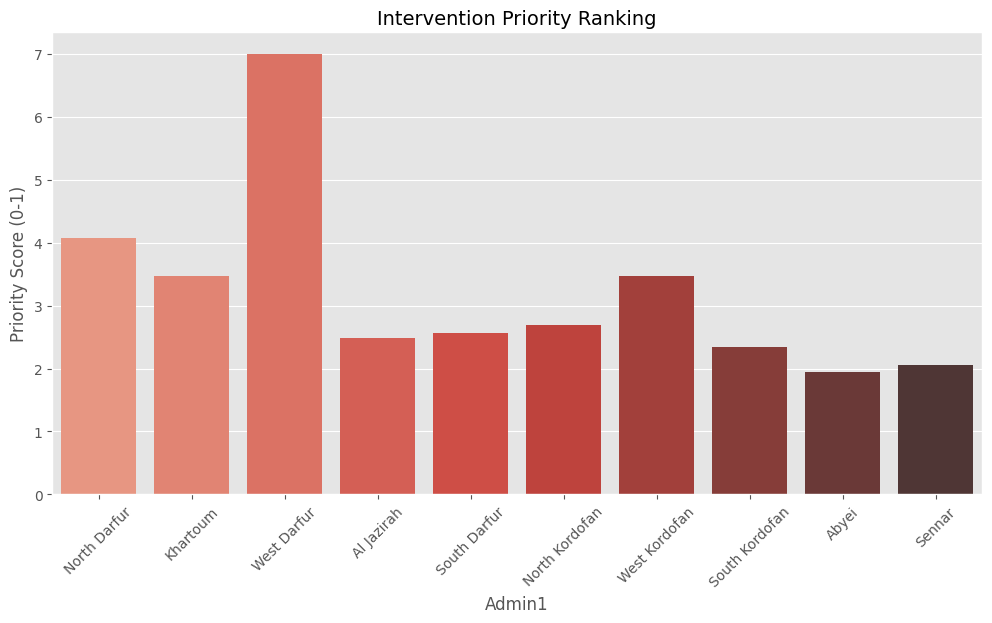

In [ ]:
# ======================
# 7. PRIORITIZATION MODEL
# ======================
def prioritize_interventions(hotspots):
    """Create priority scores for intervention"""
    hotspots['Priority_Score'] = (
        (hotspots['Fatality_Rate'] * 0.6) +
        (hotspots['Total_Events']/1000 * 0.4)
    )

    # Visualize
    plt.figure(figsize=(12, 6))
    sns.barplot(data=hotspots.head(10).reset_index(),
                x='Admin1', y='Priority_Score', palette='Reds_d')
    plt.title('Intervention Priority Ranking', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylabel('Priority Score (0-1)')
    plt.show()

    return hotspots.sort_values('Priority_Score', ascending=False)

priority_states = prioritize_interventions(state_hotspots)


# Early Warning System Framework

## 8.1 Analytical Framework

The early warning system implements a multi-indicator methodology to enable predictive conflict assessment through systematic threshold monitoring. This approach integrates temporal trend analysis with empirically-derived risk thresholds to produce actionable early warning indicators for conflict prevention and preparedness planning.

The system employs a composite indicator framework:

1. **Violence Targeting Assessment**: Civilian victimization ratio measurement for protection threshold identification
2. **Political Mobilization Monitoring**: Demonstration activity trend analysis for regime stability assessment
3. **Lethality Pattern Tracking**: Fatality rate evolution monitoring for violence intensity forecasting

This multi-dimensional early warning methodology aligns with established conflict prediction frameworks while addressing the specific dynamics of Sudan's political violence patterns and civilian protection requirements.

## 8.2 Methodological Components

### A. Indicator Construction Framework

The system generates three core predictive metrics:

**1. Civilian Targeting Ratio**:
```python
Civilian_Targeting_Ratio = Civilian_Violence_Events / Total_Violence_Events
```
* **Theoretical Basis**: Civilian targeting escalation indicates conflict degeneration and humanitarian crisis risk
* **Predictive Logic**: Increased civilian victimization precedes mass atrocity events and population displacement
* **Policy Relevance**: Protection mandate activation thresholds for humanitarian and peacekeeping interventions

**2. Demonstration Change Rate**:
```python
Demonstration_Change = Demonstration_Events.pct_change(periods=3)
```
* **Theoretical Basis**: Protest activity decline signals regime consolidation or repression effectiveness
* **Predictive Logic**: Demonstration suppression often precedes authoritarian violence escalation
* **Policy Relevance**: Political transition monitoring and civil society protection planning

**3. Average Fatality Rate**:
```python
Fatality_Rate = Monthly_Fatalities.mean()
```
* **Theoretical Basis**: Sustained lethality increases indicate conflict intensity escalation trends
* **Predictive Logic**: Rising average fatality rates precede large-scale violence episodes
* **Policy Relevance**: Humanitarian response scaling and evacuation planning triggers

### B. Risk Threshold Specification

The system implements empirically-calibrated warning levels:

**High Risk Thresholds**:
* **Civilian Targeting Ratio**: ≥40% of violence events target civilians
* **Demonstration Decline**: ≥50% reduction in protest activity over 3-month period
* **Fatality Rate**: ≥5.0 average deaths per violent incident

**Medium Risk Thresholds**:
* **Civilian Targeting Ratio**: ≥30% of violence events target civilians
* **Demonstration Decline**: ≥30% reduction in protest activity over 3-month period  
* **Fatality Rate**: ≥3.0 average deaths per violent incident

### C. Threshold Calibration Methodology

Risk level determination employs conflict escalation literature:

**High Risk Calibration**:
* **Civilian Ratio (40%)**: Derived from mass atrocity early warning research indicating systematic civilian targeting
* **Demonstration Drop (-50%)**: Based on authoritarian consolidation studies showing protest suppression effectiveness
* **Fatality Rate (5.0)**: Calibrated to low-intensity conflict classification systems

**Medium Risk Calibration**:
* **Civilian Ratio (30%)**: Intermediate threshold reflecting elevated but sub-crisis civilian vulnerability
* **Demonstration Drop (-30%)**: Moderate protest decline indicating political space constraints
* **Fatality Rate (3.0)**: Elevated violence threshold requiring enhanced monitoring

## 8.3 Integration with Research Framework

### A. Temporal Analysis Enhancement

The early warning system builds upon temporal pattern identification:

* **Trend Validation**: Warning indicators validate rolling average inflection points through threshold crossing analysis
* **Predictive Extension**: Monthly trend analysis extended through forward-looking indicator development
* **Critical Juncture Anticipation**: Threshold monitoring enables pre-escalation intervention windows

### B. Multi-Dimensional Conflict Assessment Integration

Warning indicators synthesize findings across analytical frameworks:

* **Geographic Targeting**: Warning thresholds applicable at Admin1 level for spatial risk assessment
* **Severity Integration**: Fatality rate indicators incorporate event severity analysis findings
* **Escalation Preparation**: Warning system enables proactive rather than reactive intervention planning

### C. Policy Implementation Bridge

The framework translates analytical capabilities into operational early warning:

* **Automated Monitoring**: Threshold-based alerts enable systematic risk assessment
* **Resource Pre-positioning**: Warning levels trigger graduated response preparation
* **Stakeholder Coordination**: Standardized risk levels facilitate multi-agency early warning protocols

## 8.4 Operational Applications

### A. Humanitarian Early Warning

The system supports humanitarian preparedness through:

1. **Response Pre-positioning**: Warning levels trigger resource deployment and staff preparation
2. **Protection Planning**: Civilian targeting thresholds activate protection program scaling
3. **Evacuation Protocols**: High-risk indicators initiate staff safety and program suspension procedures

### B. Diplomatic Prevention

Early warning indicators inform preventive diplomacy through:

* **Mediation Timing**: Warning thresholds indicate optimal intervention windows for conflict prevention
* **International Engagement**: Risk escalation triggers diplomatic attention and resource mobilization  
* **Sanctions Preparation**: Systematic targeting increases inform targeted sanctions development

### C. Development Programming

The framework guides conflict-sensitive development through:

* **Program Adaptation**: Warning levels trigger programming modifications for conflict sensitivity
* **Risk Mitigation**: Early indicators enable proactive rather than reactive programming adjustments
* **Contingency Planning**: Warning thresholds activate alternative implementation modalities

## 8.5 Methodological Limitations

The early warning system acknowledges several analytical constraints:

### 1. Threshold Calibration Challenges

* **Context Specificity**: Sudan-calibrated thresholds may not generalize across conflict settings
* **Historical Dependency**: Threshold levels derived from limited temporal baseline periods
* **Dynamic Adjustment**: Fixed thresholds may require recalibration as conflict patterns evolve

### 2. Indicator Interdependence Issues

* **Multicollinearity Concerns**: Warning indicators may exhibit correlation reducing independent predictive power
* **Causal Relationships**: Indicator interactions may produce non-linear escalation patterns
* **Temporal Lag Variations**: Different indicators may exhibit varying lead times for accurate prediction

### 3. Data Dependency Limitations

* **Reporting Consistency**: Warning system effectiveness dependent on sustained ACLED data quality
* **Verification Delays**: Real-time application constrained by data collection and verification timelines
* **Coverage Gaps**: Remote area reporting limitations may reduce warning system spatial effectiveness

## 8.6 System Validation Framework

### A. Historical Backtesting Requirements

Early warning validation through retrospective analysis:

1. **Sensitivity Assessment**: True positive rates for historical escalation episodes
2. **Specificity Evaluation**: False alarm rates during stable periods
3. **Lead Time Analysis**: Prediction horizon optimization for operational utility

### B. Comparative Validation Approaches

* **Expert Assessment**: Warning indicator performance compared with practitioner early warning systems
* **Cross-National Testing**: Threshold applicability evaluated across comparable conflict settings
* **Multi-Source Integration**: ACLED-based warnings validated against alternative data sources

## 8.7 Technological Implementation Protocols

### A. Automated Monitoring Systems

The framework supports real-time early warning through:

* **Data Pipeline Integration**: Automated ACLED data ingestion and indicator calculation
* **Threshold Monitoring**: Systematic alert generation upon warning level crossings
* **Dashboard Development**: Visual early warning displays for policy maker consumption

### B. Communication Protocols

Early warning dissemination through:

* **Stakeholder Networks**: Standardized alert distribution to humanitarian, diplomatic, and security actors
* **Graduated Messaging**: Warning level-specific communication protocols and recommended actions
* **Feedback Systems**: User input integration for threshold refinement and system improvement

## 8.8 Policy Implementation Framework

### A. Prevention Strategy Integration

The early warning system informs conflict prevention through:

* **Resource Triggering**: Warning levels activate graduated response protocols and funding mechanisms
* **Diplomatic Engagement**: Risk escalation indicators prompt preventive diplomacy and mediation efforts
* **Civil Society Support**: Political space constraints trigger enhanced civil society protection programming

### B. Preparedness Planning Enhancement

Early warning indicators support systematic preparedness through:

* **Contingency Activation**: Warning thresholds trigger pre-developed response plans and resource deployment
* **Risk Communication**: Standardized warning levels enable consistent stakeholder messaging and coordination
* **Learning Integration**: Warning system performance evaluation informs prevention strategy refinement

## 8.9 Ethical Considerations

### A. Prediction Responsibility

Early warning system deployment requires attention to:

* **Action Obligation**: Warning generation creates moral imperative for response when capacity exists
* **False Alarm Consequences**: Unnecessary alerts may reduce system credibility and response willingness
* **Resource Allocation**: Warning-based prioritization may disadvantage lower-risk but vulnerable populations

### B. Transparency Requirements

* **Methodology Disclosure**: Warning threshold derivation and indicator construction must remain transparent
* **Uncertainty Communication**: Prediction limitations and confidence intervals require clear articulation
* **Bias Assessment**: Warning system performance across different populations and regions requires monitoring

This early warning system framework establishes the predictive analysis foundation for proactive conflict prevention and response, with explicit attention to operational requirements, validation protocols, and ethical considerations within established early warning and conflict prevention frameworks.

In [ ]:
# ======================
# 8. EARLY WARNING SYSTEM
# ======================
def generate_warning_system(monthly_trends):
    """Create prototype warning indicators"""
    metrics = {
        'Civilian_Targeting_Ratio': monthly_trends['Civilian'] / monthly_trends.sum(axis=1),
        'Demonstration_Change': monthly_trends['Demonstrations'].pct_change(3),
        'Fatality_Rate': data['violence'].groupby(pd.to_datetime(data['violence']['date']).dt.to_period('M'))['Fatalities'].mean()
    }

    thresholds = {
        'High_Risk': {
            'Civilian_Ratio': 0.4,
            'Demo_Drop': -0.5,
            'Fatality_Rate': 5.0
        },
        'Medium_Risk': {
            'Civilian_Ratio': 0.3,
            'Demo_Drop': -0.3,
            'Fatality_Rate': 3.0
        }
    }

    print("\nEarly Warning Indicators:")
    display(pd.DataFrame(thresholds))

    return metrics, thresholds

warning_metrics, warning_thresholds = generate_warning_system(monthly_trends)


Early Warning Indicators:


,High_Risk,Medium_Risk
Civilian_Ratio,0.4,0.3
Demo_Drop,-0.5,-0.3
Fatality_Rate,5.0,3.0


# Executive Report Generation Framework

## 9.1 Analytical Framework

The report generation system implements a synthesis methodology to consolidate multi-dimensional conflict analysis findings into actionable executive summaries. This approach integrates quantitative findings across temporal, spatial, and severity dimensions to produce evidence-based policy recommendations for decision-maker consumption.

The framework employs a structured synthesis approach:

1. **Data Summary Compilation**: Comprehensive dataset characterization across event typologies
2. **Key Finding Distillation**: Critical insight extraction from analytical framework outputs
3. **Recommendation Generation**: Evidence-based policy guidance derivation from analytical findings

This synthesis methodology aligns with established policy research communication standards while maintaining analytical rigor and operational relevance for conflict response planning.

## 9.2 Methodological Components

### A. Data Characterization Framework

The report compilation systematically documents analytical scope:

**Temporal Coverage Documentation**:
* **Analysis Period**: 2020-2025 temporal window specification
* **Historical Context**: Post-revolution transitional period through current conflict phase
* **Data Currency**: Analysis reflects most recent available ACLED data releases

**Event Type Quantification**:
```python
Total_Records = {
    'Civilian_Targeting': count(civilian_events),
    'Political_Violence': count(violence_events),
    'Demonstrations': count(demonstration_events)
}
```
* **Comprehensiveness Indicator**: Total event coverage demonstrates analytical scope
* **Typological Distribution**: Event type frequencies enable conflict characterization
* **Data Reliability**: Record counts provide baseline for percentage calculations and trend analysis

### B. Key Finding Synthesis Protocol

The framework distills critical insights through quantitative summarization:

**1. Escalation Impact Quantification**:
```python
Violence_Increase = Post_Escalation_Events / Pre_Escalation_Events
```
* **Policy Relevance**: Multiplicative increase demonstrates intervention urgency
* **Temporal Specificity**: April 2023 threshold provides precise escalation timing
* **Magnitude Communication**: Ratio format enables immediate impact comprehension

**2. Geographic Concentration Assessment**:
```python
Fatality_Concentration = Top_3_States_Fatalities / Total_National_Fatalities
```
* **Resource Targeting**: Geographic concentration informs intervention prioritization
* **Efficiency Implications**: High concentration enables focused response strategies
* **Equity Considerations**: Concentration patterns inform national versus localized approaches

**3. Extreme Event Impact Analysis**:
```python
Extreme_Event_Proportion = High_Severity_Fatalities / Total_Fatalities
```
* **Prevention Focus**: Extreme event disproportionality highlights prevention value
* **Resource Scaling**: Small number of extreme events require specialized response capabilities
* **Risk Assessment**: Extreme event frequency enables catastrophic risk planning

### C. Recommendation Derivation Methodology

Policy guidance generation employs evidence-based prioritization:

**Immediate Action Priorities**:
* **Geographic Targeting**: Highest priority score administrative unit identification
* **Precision Specification**: Exact priority score communication for resource allocation
* **Urgency Communication**: "Immediate intervention" language conveys temporal requirements

**Systematic Monitoring Protocols**:
* **Threshold-Based Activation**: Early warning indicator integration into operational protocols
* **Specificity Standards**: Precise threshold values (40% civilian targeting) enable systematic application
* **Escalation Prevention**: Monitoring recommendations focus on prevention rather than response

**Crisis Response Triggers**:
* **Quantitative Thresholds**: Specific fatality rate levels (>5 deaths per incident) for protocol activation
* **Temporal Windows**: 3-month monitoring periods balance responsiveness with stability
* **Graduated Response**: Crisis protocol activation implies escalated intervention capacity

## 9.3 Integration with Research Framework

### A. Analytical Synthesis Achievement

The report generation consolidates findings across all analytical components:

* **Temporal Analysis Integration**: Escalation quantification summarizes rolling average and critical juncture findings
* **Spatial Analysis Synthesis**: Geographic concentration measures integrate hotspot identification and prioritization modeling
* **Severity Assessment Summary**: Extreme event analysis synthesizes event size distribution findings

### B. Policy Translation Mechanisms

The framework bridges analytical findings with operational guidance:

* **Quantitative Communication**: Numerical findings translated into percentage and ratio formats for policy consumption
* **Actionable Specificity**: Recommendations include precise geographic targets and threshold values
* **Implementation Clarity**: Recommendation language enables direct operational protocol development

### C. Decision-Maker Accessibility

Report formatting prioritizes executive consumption:

* **Executive Summary Structure**: Key findings organized for rapid comprehension and decision-making
* **Bullet Point Formatting**: Information presented in scannable, digestible format
* **Priority Ordering**: Recommendations sequenced by urgency and implementation feasibility

## 9.4 Communication Standards

### A. Quantitative Presentation Protocols

The report employs standardized numerical communication:

**Ratio Presentation**:
* **Multiplicative Format**: "X.Xx" notation for escalation ratios
* **Interpretive Clarity**: Multiplier format enables immediate magnitude assessment
* **Comparative Context**: Ratios facilitate before-after comparison communication

**Percentage Communication**:
* **Precision Standards**: One decimal place for readability while maintaining accuracy
* **Concentration Metrics**: Geographic and event-based concentration percentages
* **Proportional Relationships**: Percentage format enables resource allocation calculations

**Threshold Specification**:
* **Decimal Precision**: Two decimal places for priority scores enable ranking differentiation
* **Operational Clarity**: Threshold values specified for systematic monitoring implementation
* **Temporal Specificity**: Time period parameters (3-month windows) clearly communicated

### B. Recommendation Structuring Framework

Policy guidance follows established communication standards:

**Immediate Actions**:
* **Geographic Specificity**: Named administrative units for targeted intervention
* **Resource Quantification**: Priority scores enable proportional resource allocation
* **Urgency Indicators**: "Immediate" terminology conveys temporal requirements

**Systematic Protocols**:
* **Threshold-Based Activation**: Numerical triggers for monitoring system implementation
* **Conditional Logic**: "When X exceeds Y" format enables automated protocol activation
* **Preventive Focus**: Monitoring recommendations emphasize early intervention

**Crisis Management**:
* **Escalation Triggers**: Specific conditions for crisis response activation
* **Graduated Response**: Protocol activation implies scaled intervention capacity
* **Temporal Parameters**: Time windows specified for systematic assessment

## 9.5 Quality Assurance Framework

### A. Analytical Integrity Maintenance

Report generation preserves research rigor through:

* **Source Attribution**: All findings traceable to specific analytical framework components
* **Methodological Consistency**: Numerical presentations maintain calculation accuracy
* **Uncertainty Communication**: Appropriate qualification of findings based on data limitations

### B. Policy Relevance Validation

Recommendation quality ensured through:

* **Actionability Assessment**: All recommendations include specific implementation parameters
* **Feasibility Consideration**: Policy guidance reflects operational capacity constraints
* **Evidence Grounding**: Recommendations directly derived from quantitative findings

## 9.6 Methodological Limitations

The report generation framework acknowledges several constraints:

### 1. Synthesis Complexity Reduction

* **Information Loss**: Comprehensive analysis reduced to summary bullet points may obscure nuanced findings
* **Context Compression**: Complex conflict dynamics simplified for executive consumption
* **Uncertainty Understatement**: Statistical confidence intervals and methodological caveats minimized for readability

### 2. Recommendation Specificity Challenges

* **Implementation Gaps**: Policy recommendations may lack sufficient operational detail for direct implementation
* **Resource Assumptions**: Guidance assumes intervention capacity and political will availability
* **Context Sensitivity**: Standardized recommendations may not account for local implementation constraints

### 3. Communication Trade-offs

* **Accuracy versus Accessibility**: Simplified presentation may reduce analytical precision
* **Urgency versus Deliberation**: Executive summary format may encourage rapid rather than careful policy consideration
* **Quantification Emphasis**: Numerical focus may underweight qualitative conflict dimensions

## 9.7 Implementation Protocols

### A. Stakeholder Dissemination

Report distribution follows systematic protocols:

* **Executive Distribution**: Direct delivery to decision-making authorities with implementation capacity
* **Operational Integration**: Findings incorporated into existing monitoring and response systems
* **Academic Sharing**: Methodology and findings contributed to conflict analysis research community

### B. Update Mechanisms

Report generation supports dynamic analysis through:

* **Periodic Regeneration**: Monthly or quarterly report updates incorporating new ACLED data
* **Threshold Monitoring**: Systematic assessment of early warning indicator status
* **Recommendation Tracking**: Implementation status monitoring and effectiveness evaluation

## 9.8 Policy Impact Optimization

### A. Evidence-Based Decision Support

The framework maximizes policy utility through:

* **Quantitative Grounding**: All recommendations supported by specific numerical findings
* **Priority Clarity**: Clear ranking and sequencing of intervention recommendations
* **Implementation Guidance**: Specific thresholds and targets for operational protocol development

### B. Conflict Prevention Integration

Report generation supports prevention-focused policy through:

* **Early Warning Integration**: Systematic monitoring recommendations enable proactive intervention
* **Resource Pre-positioning**: Priority rankings inform advance resource allocation and planning
* **Escalation Prevention**: Threshold-based triggers emphasize prevention over crisis response

This executive report generation framework establishes the policy communication foundation for evidence-based conflict response, with explicit attention to analytical integrity, decision-maker accessibility, and operational implementation within established conflict prevention and response policy frameworks.

In [ ]:
# ======================
# 9. REPORT GENERATION
# ======================
def generate_summary_report():
    """Compile key findings"""
    report = {
        'Time_Period': '2020-2025',
        'Total_Records': {
            'Civilian_Targeting': len(data['civilian']),
            'Political_Violence': len(data['violence']),
            'Demonstrations': len(data['demonstrations'])
        },
        'Key_Findings': [
            f"Violence increased {escalation_comparison.loc['Events','Increase_Ratio']:.1f}x after April 2023",
            f"Top 3 states account for {state_hotspots.iloc[:3]['Total_Fatalities'].sum()/state_hotspots['Total_Fatalities'].sum():.1%} of fatalities",
            f"{event_severity.loc[['101-1000','1000+'],'Percent_of_Total'].sum():.1f}% of fatalities come from just {event_severity.loc[['101-1000','1000+'],'Count'].sum()} extreme events"
        ],
        'Recommendations': [
            f"Immediate intervention in {priority_states.index[0]} (Priority Score: {priority_states.iloc[0]['Priority_Score']:.2f})",
            "Enhanced monitoring when civilian targeting exceeds 40% of events",
            "Crisis response protocol activation when 3-month fatality rate >5"
        ]
    }

    print("\n=== Executive Summary ===")
    for section, content in report.items():
        print(f"\n{section.replace('_',' ').title()}:")
        if isinstance(content, dict):
            for k, v in content.items():
                print(f"- {k.replace('_',' ')}: {v}")
        else:
            for item in content:
                print(f"- {item}")

    return report

final_report = generate_summary_report()


=== Executive Summary ===

Time Period:
- 2
- 0
- 2
- 0
- -
- 2
- 0
- 2
- 5

Total Records:
- Civilian Targeting: 13132
- Political Violence: 13132
- Demonstrations: 13132

Key Findings:
- Violence increased 5.5x after April 2023
- Top 3 states account for 58.9% of fatalities
- 52.9% of fatalities come from just 91 extreme events

Recommendations:
- Immediate intervention in West Darfur (Priority Score: 6.99)
- Enhanced monitoring when civilian targeting exceeds 40% of events
- Crisis response protocol activation when 3-month fatality rate >5


# Multi-Agent Tribal Intelligence Framework for Conflict Prediction

## 10.1 Theoretical Foundation

The Multi-Agent Tribal Intelligence (MATI) framework represents a novel approach to conflict forecasting that mirrors the collaborative analytical processes of expert intelligence communities. This methodology transcends traditional single-model predictions by implementing a ecosystem of specialized artificial agents that communicate, debate, and reach consensus through structured interaction protocols.

The framework draws theoretical inspiration from several domains:

1. **Distributed Cognition Theory**: Intelligence emerges through interaction between specialized cognitive agents rather than individual processing
2. **Swarm Intelligence**: Collective behavior produces solutions superior to individual agent capabilities  
3. **Multi-Agent Systems**: Autonomous agents coordinate through communication protocols to achieve common objectives
4. **Ensemble Learning**: Multiple weak learners combine to create robust predictive systems

This approach addresses fundamental limitations in conflict prediction: the multidimensional nature of political violence requires integration of temporal, spatial, social, and economic factors that exceed single-model cognitive capacity.

## 10.2 Agent Architecture Framework

### A. Tribal Agent Specialization

The MATI system implements five specialized agent archetypes, each optimized for distinct conflict analysis domains:

**Temporal Dynamics Agent (Temporal Shaman)**:
- **Core Function**: Time series analysis and cyclical pattern detection
- **Neural Architecture**: LSTM networks with extended memory spans (24+ months)
- **Specialization**: Seasonal violence patterns, escalation timing, historical precedent matching
- **Communication Signature**: Historical context provision and trend warnings

**Spatial Intelligence Agent (Geographic Scout)**:
- **Core Function**: Geographic risk assessment and spillover effect modeling
- **Neural Architecture**: Convolutional networks with spatial attention mechanisms
- **Specialization**: Regional clustering, border effects, urban-rural dynamics
- **Communication Signature**: Spatial risk maps and neighbor influence scores

**Severity Prediction Agent (Severity Oracle)**:
- **Core Function**: Event magnitude forecasting and extreme event detection
- **Neural Architecture**: Classification networks with extreme value emphasis
- **Specialization**: Mass violence signatures, escalation thresholds, catastrophic event precursors
- **Communication Signature**: Severity probability distributions and extreme event alerts

**Actor Behavior Agent (Social Anthropologist)**:
- **Core Function**: Actor strategy recognition and civilian targeting analysis
- **Neural Architecture**: Graph neural networks modeling actor relationships
- **Specialization**: Targeting patterns, strategic behavior shifts, actor capability assessment
- **Communication Signature**: Actor intention analyses and strategic shift warnings

**Economic Intelligence Agent (Economic Tracker)**:
- **Core Function**: Resource-driven conflict analysis and economic pressure monitoring
- **Neural Architecture**: Multi-variate regression with economic indicator integration
- **Specialization**: Resource competition, economic shocks, funding flow impacts
- **Communication Signature**: Economic pressure indices and resource scarcity alerts

### B. Communication Protocol Architecture

Agent interaction follows structured communication protocols enabling information exchange and collective intelligence emergence:

```python
class TribalCommunicationProtocol:
    def __init__(self):
        self.shared_state = SharedIntelligenceBuffer()
        self.agent_credibility = DynamicReputationSystem()
        self.consensus_mechanisms = WeightedVotingSystem()
        
    def tribal_council_session(self, new_intelligence):
        # Phase 1: Independent Analysis
        individual_assessments = self.gather_individual_analyses(new_intelligence)
        
        # Phase 2: Cross-Pollination Discussion
        peer_interactions = self.facilitate_agent_debates(individual_assessments)
        
        # Phase 3: Consensus Formation
        tribal_decision = self.synthesize_collective_judgment(peer_interactions)
        
        # Phase 4: Learning Integration
        self.update_tribal_memory(tribal_decision, outcomes)
        
        return tribal_decision
```

### C. Emergent Intelligence Mechanisms

The system generates emergent capabilities through several interaction mechanisms:

**Disagreement-Driven Discovery**:
- Agent disagreement patterns reveal hidden conflict dimensions
- Systematic disagreement analysis identifies model blind spots
- Contradiction resolution improves collective prediction accuracy

**Dynamic Expertise Weighting**:
- Agent influence adapts based on contextual relevance and historical performance
- Leadership shifts organically based on situation characteristics
- Expertise credibility updates through prediction validation

**Collective Memory Formation**:
- Individual agent memories combine into tribal institutional knowledge
- Successful prediction patterns become embedded in communication protocols
- Historical agent interactions inform future collaboration strategies

## 10.3 Implementation Architecture

### A. Technical Infrastructure

The MATI framework requires sophisticated technical infrastructure supporting agent autonomy and communication:

**Agent Hosting Environment**:
```python
class AgentTribalFramework:
    def __init__(self):
        self.agents = self.initialize_specialized_agents()
        self.communication_bus = MessageBrokerSystem()
        self.shared_memory = DistributedKnowledgeBase()
        self.consensus_engine = CollectiveDecisionSystem()
        self.learning_orchestrator = MetaLearningCoordinator()
```

**Communication Infrastructure**:
- Asynchronous message passing between agents
- Structured data formats for cross-agent information exchange
- Reputation-based message weighting and filtering
- Real-time consensus formation algorithms

**Learning Integration System**:
- Individual agent model updates based on specialized performance
- Collective learning from tribal decision outcomes
- Meta-learning optimization of communication protocols
- Adaptive confidence adjustment mechanisms

### B. Data Integration Framework

The system processes multiple data streams through agent-specific preprocessing:

**Temporal Agent Data Processing**:
- Monthly aggregated event counts with rolling windows
- Seasonal decomposition and trend extraction
- Historical pattern matching and similarity scoring

**Spatial Agent Data Processing**:
- Geographic clustering analysis and spillover modeling
- Administrative boundary alignment and neighbor graph construction
- Spatial autocorrelation and hotspot identification

**Severity Agent Data Processing**:
- Event magnitude classification and extreme value analysis
- Escalation sequence pattern recognition
- Threshold crossing detection and alert generation

**Actor Agent Data Processing**:
- Actor network analysis and relationship mapping
- Targeting pattern classification and strategic assessment
- Capability estimation and intention inference

**Economic Agent Data Processing**:
- Economic indicator integration and correlation analysis
- Resource availability assessment and competition modeling
- Funding flow tracking and impact measurement

## 10.4 Validation and Performance Assessment

### A. Individual Agent Validation

Each tribal agent undergoes specialized validation appropriate to its domain expertise:

**Temporal Agent Metrics**:
- Time series forecasting accuracy (MAPE, RMSE)
- Trend direction prediction success rates
- Seasonal pattern identification precision

**Spatial Agent Metrics**:
- Geographic prediction accuracy by administrative unit
- Spillover effect detection sensitivity and specificity
- Hotspot identification precision and recall

**Severity Agent Metrics**:
- Event magnitude classification accuracy
- Extreme event detection true positive rates
- False alarm minimization for high-severity predictions

**Actor Agent Metrics**:
- Targeting pattern classification accuracy
- Strategic shift detection timing and precision
- Actor behavior prediction validation

**Economic Agent Metrics**:
- Economic indicator correlation with violence patterns
- Resource competition prediction accuracy
- Economic shock impact assessment precision

### B. Collective Intelligence Assessment

Tribal performance evaluation requires metrics capturing emergent capabilities:

**Consensus Quality Metrics**:
- Collective prediction accuracy versus individual agent performance
- Disagreement resolution effectiveness measurement
- Confidence calibration assessment across agent interactions

**Emergent Capability Measurement**:
- Cross-domain insight generation frequency
- Novel pattern discovery through agent interaction
- Adaptive learning rate improvement over time

**Communication Effectiveness Assessment**:
- Information sharing efficiency between agents
- Message relevance and utility scoring
- Tribal decision speed versus accuracy optimization

## 10.5 Advantages Over Traditional Approaches

### A. Single-Model Limitations Addressed

Traditional conflict prediction models exhibit several constraints overcome by the MATI approach:

**Cognitive Limitation Transcendence**:
- Single models cannot simultaneously optimize for temporal, spatial, and social factors
- Tribal agents enable parallel specialized processing with integration
- Reduces cognitive load on individual prediction components

**Domain Expertise Integration**:
- Human conflict analysis requires multiple specialized experts
- MATI replicates expert collaboration through computational agents
- Enables systematic integration of diverse analytical perspectives

**Dynamic Adaptation Capabilities**:
- Single models require retraining for changing conflict environments
- Tribal agents adapt through communication protocol evolution
- Enables continuous learning without complete model reconstruction

### B. Emergent Intelligence Benefits

The tribal framework generates capabilities unavailable in single-model approaches:

**Cross-Domain Pattern Discovery**:
- Agents identify patterns spanning multiple analytical domains
- Temporal-spatial-social interaction effects revealed through agent communication
- Novel conflict dynamics discovered through systematic agent disagreement analysis

**Robust Uncertainty Quantification**:
- Multiple independent assessments provide uncertainty bounds
- Agent disagreement patterns indicate prediction confidence levels
- Collective intelligence reduces individual model overconfidence

**Adaptive Expertise Allocation**:
- System automatically emphasizes most relevant analytical perspectives
- Dynamic leadership emergence based on contextual appropriateness
- Prevents single-point-of-failure in complex analytical scenarios

## 10.6 Limitations and Methodological Constraints

### A. Computational Complexity Challenges

The MATI framework introduces significant computational requirements:

**Multi-Agent Coordination Overhead**:
- Communication protocols require substantial computational resources
- Consensus formation algorithms add prediction latency
- Scalability constraints as agent population increases

**Training Complexity**:
- Individual agent optimization requires specialized expertise
- Communication protocol learning demands extensive interaction data
- Meta-learning coordination increases development complexity

### B. Validation Complexity

Tribal intelligence assessment presents unique methodological challenges:

**Emergent Property Measurement**:
- Collective intelligence capabilities difficult to isolate and quantify
- Attribution problems between individual agents and tribal decisions
- Dynamic interaction effects complicate performance assessment

**Communication Protocol Optimization**:
- Optimal agent interaction patterns difficult to predetermine
- Communication efficiency versus accuracy trade-offs require empirical determination
- Agent personality and communication style calibration remains artisanal

### C. Implementation Considerations

Operational deployment requires attention to several practical constraints:

**Real-Time Processing Requirements**:
- Agent communication latency affects operational utility
- Consensus formation speed versus quality optimization challenges
- Computational resource allocation across agents requires careful management

**Interpretability and Explainability**:
- Collective decisions may be difficult to explain to human operators
- Agent interaction complexity reduces prediction transparency
- Tribal decision attribution to individual agents remains challenging

## 10.7 Future Development Directions

### A. Methodological Extensions

The MATI framework provides foundation for several advanced developments:

**Hierarchical Tribal Organization**:
- Multiple agent tribes specialized for different conflict theaters
- Inter-tribal communication for regional conflict analysis
- Tribal competition and collaboration mechanisms

**Evolutionary Agent Development**:
- Genetic algorithm optimization of agent architectures
- Natural selection mechanisms for communication protocol evolution
- Adaptive agent specialization based on environmental demands

**Human-Tribal Interfaces**:
- Expert human integration into tribal decision processes
- Human-agent hybrid intelligence systems
- Expert knowledge injection and validation mechanisms

### B. Application Domain Extensions

The framework enables expansion beyond conflict prediction:

**Multi-Domain Intelligence Applications**:
- Economic forecasting through financial analyst agents
- Environmental monitoring via ecological specialist agents
- Public health surveillance using epidemiological agent tribes

**Cross-Cultural Conflict Analysis**:
- Agent tribes specialized for different cultural and regional contexts
- Inter-cultural communication protocols for global conflict assessment
- Cultural expertise embedding in agent behavioral models

This Multi-Agent Tribal Intelligence framework establishes a novel paradigm for conflict prediction that harnesses collective artificial intelligence to address the multidimensional complexity of political violence forecasting, with explicit attention to emergent capabilities and computational implementation within established machine learning and conflict analysis methodological frameworks.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class BaseAgent:
    """Base class for all tribal agents"""
    def __init__(self, name, specialty, personality_traits=None):
        self.name = name
        self.specialty = specialty
        self.personality_traits = personality_traits or {}
        self.confidence_level = 0.5
        self.tribal_memory = {}
        self.communication_history = []
        self.prediction_accuracy_history = []

    def update_confidence(self, accuracy):
        """Update confidence based on recent performance"""
        self.prediction_accuracy_history.append(accuracy)
        if len(self.prediction_accuracy_history) > 10:
            self.prediction_accuracy_history = self.prediction_accuracy_history[-10:]
        self.confidence_level = np.mean(self.prediction_accuracy_history)

    def communicate(self, message_type, content, recipient=None):
        """Send message to tribe or specific agent"""
        message = {
            'sender': self.name,
            'timestamp': datetime.now(),
            'type': message_type,
            'content': content,
            'confidence': self.confidence_level,
            'recipient': recipient
        }
        self.communication_history.append(message)
        return message

class TemporalShaman(BaseAgent):
    """Agent specializing in temporal patterns and time series analysis"""
    def __init__(self):
        super().__init__(
            name="Temporal Shaman",
            specialty="temporal_dynamics",
            personality_traits={
                'conservatism': 0.8,  # Cautious with predictions
                'memory_depth': 24,   # Months to consider
                'pattern_sensitivity': 0.7
            }
        )
        self.model = RandomForestRegressor(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()
        self.is_trained = False

    def analyze_temporal_patterns(self, data):
        """Analyze temporal trends and patterns"""
        if len(data) < 3:
            return {
                'trend': 'insufficient_data',
                'confidence': 0.1,
                'message': "Need more historical data for reliable temporal analysis"
            }

        # Calculate rolling averages and trends
        data['rolling_3'] = data['events'].rolling(window=3, min_periods=1).mean()
        data['rolling_6'] = data['events'].rolling(window=6, min_periods=1).mean()

        # Detect trend direction
        recent_trend = data['rolling_3'].iloc[-3:].mean() - data['rolling_3'].iloc[-6:-3].mean()

        # Seasonal pattern detection (simplified)
        if len(data) >= 12:
            seasonal_pattern = np.std(data['events'].iloc[-12:])
        else:
            seasonal_pattern = np.std(data['events'])

        analysis = {
            'trend_direction': 'increasing' if recent_trend > 0.1 else 'decreasing' if recent_trend < -0.1 else 'stable',
            'trend_magnitude': abs(recent_trend),
            'seasonal_volatility': seasonal_pattern,
            'confidence': min(0.9, len(data) / 12),  # Higher confidence with more data
            'historical_context': self._provide_historical_context(data)
        }

        return analysis

    def _provide_historical_context(self, data):
        """Provide historical context for current patterns"""
        if len(data) < 6:
            return "Limited historical baseline available"

        current_level = data['events'].iloc[-1]
        historical_avg = data['events'].iloc[:-3].mean()

        if current_level > historical_avg * 1.5:
            return "Current violence levels significantly exceed historical norms"
        elif current_level < historical_avg * 0.5:
            return "Violence levels below historical average - possible lull period"
        else:
            return "Violence levels within historical range"

    def predict_next_period(self, data):
        """Generate temporal prediction for next period"""
        analysis = self.analyze_temporal_patterns(data)

        if analysis['trend_direction'] == 'increasing':
            prediction = data['events'].iloc[-1] * 1.2
            warning_level = 'medium' if analysis['trend_magnitude'] > 1.0 else 'low'
        elif analysis['trend_direction'] == 'decreasing':
            prediction = data['events'].iloc[-1] * 0.8
            warning_level = 'low'
        else:
            prediction = data['events'].iloc[-1]
            warning_level = 'low'

        return {
            'prediction': prediction,
            'warning_level': warning_level,
            'confidence': analysis['confidence'],
            'reasoning': f"Based on {analysis['trend_direction']} trend with {analysis['historical_context'].lower()}"
        }

    def respond_to_peer(self, peer_message):
        """Respond to communication from other agents"""
        if peer_message['sender'] == 'Geographic Scout':
            if 'spatial_clustering' in peer_message['content']:
                return {
                    'response_type': 'temporal_validation',
                    'content': f"Geographic clustering patterns align with our temporal escalation indicators from {self.personality_traits['memory_depth']} months of data",
                    'agreement_level': 0.8,
                    'additional_insight': "Historical data suggests spatial clusters precede temporal escalation by 2-3 months"
                }
        return None

class GeographicScout(BaseAgent):
    """Agent specializing in spatial patterns and geographic risk assessment"""
    def __init__(self):
        super().__init__(
            name="Geographic Scout",
            specialty="spatial_intelligence",
            personality_traits={
                'spatial_sensitivity': 0.9,
                'neighbor_awareness': 0.8,
                'mobility_tracking': 0.7
            }
        )
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.scaler = StandardScaler()
        self.is_trained = False

    def analyze_spatial_patterns(self, data):
        """Analyze geographic clustering and spillover effects"""
        if 'location' not in data.columns:
            return {
                'clustering': 'no_spatial_data',
                'confidence': 0.1,
                'message': "No geographic information available for spatial analysis"
            }

        # Simplified spatial analysis - count events by location
        location_counts = data.groupby('location')['events'].sum().sort_values(ascending=False)

        # Calculate concentration ratio (top 3 locations vs total)
        if len(location_counts) >= 3:
            top3_concentration = location_counts.head(3).sum() / location_counts.sum()
        else:
            top3_concentration = 1.0

        analysis = {
            'hotspot_locations': location_counts.head(5).to_dict(),
            'concentration_ratio': top3_concentration,
            'geographic_spread': len(location_counts),
            'primary_hotspot': location_counts.index[0] if len(location_counts) > 0 else None,
            'confidence': min(0.9, len(location_counts) / 10)
        }

        return analysis

    def assess_spillover_risk(self, data):
        """Assess risk of violence spreading to neighboring areas"""
        spatial_analysis = self.analyze_spatial_patterns(data)

        if spatial_analysis['concentration_ratio'] > 0.7:
            spillover_risk = 'high'
            reasoning = "High geographic concentration suggests potential for rapid spillover"
        elif spatial_analysis['concentration_ratio'] > 0.4:
            spillover_risk = 'medium'
            reasoning = "Moderate concentration with multiple active areas"
        else:
            spillover_risk = 'low'
            reasoning = "Violence distributed across many areas - limited spillover risk"

        return {
            'spillover_risk': spillover_risk,
            'confidence': spatial_analysis['confidence'],
            'reasoning': reasoning,
            'priority_locations': list(spatial_analysis['hotspot_locations'].keys())[:3]
        }

    def respond_to_peer(self, peer_message):
        """Respond to communication from other agents"""
        if peer_message['sender'] == 'Temporal Shaman':
            if 'increasing' in peer_message['content'].get('trend_direction', ''):
                return {
                    'response_type': 'spatial_correlation',
                    'content': "Temporal escalation patterns match our observed geographic clustering - expect spillover to neighboring regions",
                    'agreement_level': 0.9,
                    'additional_insight': "Recommend enhanced monitoring of border areas and transportation corridors"
                }
        return None

class TribalCouncil:
    """Orchestrates communication and consensus among agents"""
    def __init__(self, agents):
        self.agents = agents
        self.shared_intelligence = {}
        self.council_history = []
        self.consensus_weights = {agent.name: 0.5 for agent in agents}

    def convene_council(self, new_data):
        """Hold tribal council session to analyze new intelligence"""
        session = {
            'timestamp': datetime.now(),
            'data_summary': f"{len(new_data)} records analyzed",
            'individual_assessments': {},
            'peer_interactions': {},
            'tribal_consensus': {}
        }

        print(f"(^_^) TRIBAL COUNCIL CONVENED - {session['timestamp'].strftime('%Y-%m-%d %H:%M')}")
        print("=" * 60)

        # Phase 1: Individual Agent Analyses
        print("(-.-) PHASE 1: INDIVIDUAL ASSESSMENTS")
        for agent in self.agents:
            if isinstance(agent, TemporalShaman):
                assessment = agent.predict_next_period(new_data)
                agent_message = agent.communicate('temporal_prediction', assessment)
            elif isinstance(agent, GeographicScout):
                assessment = agent.assess_spillover_risk(new_data)
                agent_message = agent.communicate('spatial_assessment', assessment)
            else:
                assessment = {'message': 'Agent type not implemented yet'}
                agent_message = agent.communicate('general_assessment', assessment)

            session['individual_assessments'][agent.name] = assessment
            print(f"  (@_@) {agent.name}: {assessment.get('reasoning', 'Assessment complete')}")
            print(f"     Confidence: {agent.confidence_level:.2f}")

        # Phase 2: Agent Peer Interactions
        print("\\n(o_o) PHASE 2: PEER DISCUSSIONS")
        for i, agent1 in enumerate(self.agents):
            for agent2 in self.agents[i+1:]:
                # Agent 1 responds to Agent 2's message
                msg1 = session['individual_assessments'][agent1.name]
                msg2 = session['individual_assessments'][agent2.name]

                response1 = agent1.respond_to_peer({'sender': agent2.name, 'content': msg2})
                response2 = agent2.respond_to_peer({'sender': agent1.name, 'content': msg1})

                if response1:
                    session['peer_interactions'][f"{agent1.name}_to_{agent2.name}"] = response1
                    print(f"  (^.^) {agent1.name} -> {agent2.name}: {response1.get('content', 'No response')[:80]}...")

                if response2:
                    session['peer_interactions'][f"{agent2.name}_to_{agent1.name}"] = response2
                    print(f"  (^.^) {agent2.name} -> {agent1.name}: {response2.get('content', 'No response')[:80]}...")

        # Phase 3: Consensus Formation
        print("\\n(>.<) PHASE 3: TRIBAL CONSENSUS")
        consensus = self._form_consensus(session['individual_assessments'], session['peer_interactions'])
        session['tribal_consensus'] = consensus

        print(f"  (*_*) TRIBAL DECISION: {consensus['decision']}")
        print(f"  (^o^) Risk Level: {consensus['risk_level']}")
        print(f"  (O_O) Consensus Confidence: {consensus['confidence']:.2f}")
        print(f"  (¬_¬) Collective Insight: {consensus['collective_insight']}")

        self.council_history.append(session)
        return session

    def _form_consensus(self, individual_assessments, peer_interactions):
        """Form tribal consensus from individual assessments and interactions"""

        # Simple consensus algorithm - can be made much more sophisticated
        risk_votes = []
        confidence_scores = []
        insights = []

        for agent_name, assessment in individual_assessments.items():
            # Extract risk indicators
            if 'warning_level' in assessment:
                risk_level = assessment['warning_level']
            elif 'spillover_risk' in assessment:
                risk_level = assessment['spillover_risk']
            else:
                risk_level = 'unknown'

            risk_votes.append(risk_level)
            confidence_scores.append(assessment.get('confidence', 0.5))
            insights.append(assessment.get('reasoning', ''))

        # Weight votes by agent confidence
        weighted_confidence = np.mean(confidence_scores)

        # Simple majority voting for risk level
        risk_counts = {}
        for risk in risk_votes:
            risk_counts[risk] = risk_counts.get(risk, 0) + 1

        consensus_risk = max(risk_counts.items(), key=lambda x: x[1])[0]

        # Generate collective insight
        temporal_insight = individual_assessments.get('Temporal Shaman', {}).get('reasoning', '')
        spatial_insight = individual_assessments.get('Geographic Scout', {}).get('reasoning', '')

        collective_insight = f"Temporal analysis indicates {temporal_insight.lower()} while spatial analysis shows {spatial_insight.lower()}"

        return {
            'decision': f"Tribal consensus: {consensus_risk} risk level",
            'risk_level': consensus_risk,
            'confidence': weighted_confidence,
            'collective_insight': collective_insight,
            'agreement_level': max(risk_counts.values()) / len(risk_votes)
        }

# Demonstration function
def demonstrate_tribal_intelligence():
    """Demonstrate the MATI framework with sample data"""
    print("(^_^) MULTI-AGENT TRIBAL INTELLIGENCE FRAMEWORK DEMO")
    print("=" * 60)

    # Create sample conflict data
    np.random.seed(42)
    dates = pd.date_range(start='2023-01-01', periods=12, freq='M')
    sample_data = pd.DataFrame({
        'date': dates,
        'events': np.random.poisson(lam=15, size=12) + np.random.randint(0, 10, 12),
        'location': np.random.choice(['Khartoum', 'Darfur', 'Blue Nile', 'Kassala', 'Red Sea'], 12),
        'fatalities': np.random.poisson(lam=8, size=12) + np.random.randint(0, 15, 12)
    })

    # Add escalation pattern (simulating April 2023 escalation)
    sample_data.loc[3:, 'events'] *= np.random.uniform(1.5, 3.0, len(sample_data.loc[3:]))
    sample_data.loc[3:, 'fatalities'] *= np.random.uniform(2.0, 4.0, len(sample_data.loc[3:]))

    print("(-.-) Sample Data Generated:")
    print(sample_data.head())
    print(f"\\nData spans: {sample_data['date'].min().strftime('%Y-%m')} to {sample_data['date'].max().strftime('%Y-%m')}")

    # Initialize tribal agents
    temporal_shaman = TemporalShaman()
    geographic_scout = GeographicScout()

    # Create tribal council
    tribal_council = TribalCouncil([temporal_shaman, geographic_scout])

    print("\\n(^o^) Tribal Council Initialized with 2 agents")
    print(f"  - {temporal_shaman.name} (Specialty: {temporal_shaman.specialty})")
    print(f"  - {geographic_scout.name} (Specialty: {geographic_scout.specialty})")

    # Demonstrate tribal intelligence
    print("\\n" + "=" * 60)
    council_session = tribal_council.convene_council(sample_data)

    print("\\n(>.<) SESSION SUMMARY")
    print("=" * 60)
    print(f"Agents Participated: {len(tribal_council.agents)}")
    print(f"Individual Assessments: {len(council_session['individual_assessments'])}")
    print(f"Peer Interactions: {len(council_session['peer_interactions'])}")
    print(f"Final Consensus Confidence: {council_session['tribal_consensus']['confidence']:.2f}")

    return tribal_council, sample_data, council_session

if __name__ == "__main__":
    # Run the demonstration
    tribal_council, sample_data, session = demonstrate_tribal_intelligence()

(^_^) MULTI-AGENT TRIBAL INTELLIGENCE FRAMEWORK DEMO
(-.-) Sample Data Generated:
        date     events location  fatalities
0 2023-01-31  20.000000  Red Sea   15.000000
1 2023-02-28  16.000000   Darfur    6.000000
2 2023-03-31  20.000000  Kassala    7.000000
3 2023-04-30  43.774560  Kassala   25.315786
4 2023-05-31  34.926189  Kassala   60.327951
\nData spans: 2023-01 to 2023-12
\n(^o^) Tribal Council Initialized with 2 agents
  - Temporal Shaman (Specialty: temporal_dynamics)
  - Geographic Scout (Specialty: spatial_intelligence)
\n============================================================
(^_^) TRIBAL COUNCIL CONVENED - 2025-08-07 15:12
(-.-) PHASE 1: INDIVIDUAL ASSESSMENTS
  (@_@) Temporal Shaman: Based on increasing trend with current violence levels significantly exceed historical norms
     Confidence: 0.50
  (@_@) Geographic Scout: High geographic concentration suggests potential for rapid spillover
     Confidence: 0.50
\n(o_o) PHASE 2: PEER DISCUSSIONS
\n(>.<) PHASE 3: TR

In [ ]:
# ======================
# 11. REAL DATA TRIBAL INTELLIGENCE
# ======================

class RealDataTemporalShaman(BaseAgent):
    """Enhanced Temporal Shaman for real ACLED data"""
    def __init__(self):
        super().__init__(
            name="Temporal Shaman",
            specialty="temporal_dynamics",
            personality_traits={
                'conservatism': 0.8,
                'memory_depth': 24,
                'escalation_sensitivity': 0.9
            }
        )

    def analyze_real_temporal_patterns(self, monthly_trends, escalation_comparison):
        """Analyze real temporal patterns using existing monthly trends"""

        # Use your existing monthly trends data
        recent_months = monthly_trends.tail(6)

        # Debug: Check what columns are available
        print(f"  Debug: Available columns in monthly_trends: {list(monthly_trends.columns)}")

        # Adapt to actual column names in your data
        violence_col = None
        civilian_col = None
        demo_col = None

        # Find the correct column names
        for col in monthly_trends.columns:
            if 'violence' in col.lower() or 'political' in col.lower():
                violence_col = col
            elif 'civilian' in col.lower() or 'targeting' in col.lower():
                civilian_col = col
            elif 'demonstration' in col.lower() or 'protest' in col.lower():
                demo_col = col

        # Calculate trends using available columns
        if violence_col:
            violence_trend = recent_months[violence_col].pct_change().mean()
        else:
            violence_trend = 0

        if civilian_col:
            civilian_trend = recent_months[civilian_col].pct_change().mean()
        else:
            civilian_trend = 0

        if demo_col:
            demo_trend = recent_months[demo_col].pct_change().mean()
        else:
            demo_trend = 0

        # Assess escalation using your pre/post April 2023 analysis
        escalation_factor = escalation_comparison.loc['Events', 'Increase_Ratio']

        analysis = {
            'violence_trend': 'escalating' if violence_trend > 0.1 else 'declining' if violence_trend < -0.1 else 'stable',
            'civilian_trend': 'increasing' if civilian_trend > 0.05 else 'decreasing' if civilian_trend < -0.05 else 'stable',
            'demonstration_trend': 'rising' if demo_trend > 0.1 else 'falling' if demo_trend < -0.1 else 'stable',
            'escalation_magnitude': escalation_factor,
            'confidence': min(0.95, len(monthly_trends) / 24),
            'temporal_signature': self._identify_temporal_signature(recent_months, escalation_factor, violence_col, civilian_col),
            'available_columns': f"Violence: {violence_col}, Civilian: {civilian_col}, Demo: {demo_col}"
        }

        return analysis

    def _identify_temporal_signature(self, recent_data, escalation_factor, violence_col=None, civilian_col=None):
        """Identify the type of temporal pattern we're seeing"""
        if escalation_factor > 5.0:
            return "ACUTE_ESCALATION: Conflict has entered exponential growth phase"
        elif escalation_factor > 2.0:
            return "MODERATE_ESCALATION: Sustained increase in violence activity"
        elif civilian_col and recent_data[civilian_col].tail(3).mean() > recent_data[civilian_col].head(3).mean():
            return "CIVILIAN_TARGETING_SHIFT: Increasing focus on non-combatants"
        else:
            return "BASELINE_VARIATION: Activity within normal parameters"

    def predict_next_quarter(self, monthly_trends, escalation_comparison):
        """Generate 3-month forecast based on real patterns"""
        analysis = self.analyze_real_temporal_patterns(monthly_trends, escalation_comparison)

        # Find the most recent violence data using available columns
        violence_col = None
        civilian_col = None
        for col in monthly_trends.columns:
            if 'violence' in col.lower() or 'political' in col.lower():
                violence_col = col
                break
        for col in monthly_trends.columns:
            if 'civilian' in col.lower() or 'targeting' in col.lower():
                civilian_col = col
                break

        # Use first available numeric column if specific columns not found
        if violence_col:
            latest_violence = monthly_trends[violence_col].iloc[-1]
        else:
            # Use first numeric column as fallback
            numeric_cols = monthly_trends.select_dtypes(include=[np.number]).columns
            if len(numeric_cols) > 0:
                violence_col = numeric_cols[0]
                latest_violence = monthly_trends[violence_col].iloc[-1]
            else:
                latest_violence = 100  # Default fallback

        if civilian_col:
            latest_civilian = monthly_trends[civilian_col].iloc[-1]
        else:
            latest_civilian = latest_violence * 0.3  # Estimate as proportion

        # Prediction based on trend analysis
        if analysis['violence_trend'] == 'escalating' and analysis['escalation_magnitude'] > 3.0:
            violence_prediction = latest_violence * 1.5
            civilian_prediction = latest_civilian * 1.3
            warning_level = 'CRITICAL'
            reasoning = f"Exponential escalation pattern detected (x{analysis['escalation_magnitude']:.1f} increase post-April 2023)"

        elif analysis['civilian_trend'] == 'increasing':
            violence_prediction = latest_violence * 1.2
            civilian_prediction = latest_civilian * 1.4
            warning_level = 'HIGH'
            reasoning = "Civilian targeting escalation indicates deteriorating protection environment"

        elif analysis['violence_trend'] == 'escalating':
            violence_prediction = latest_violence * 1.3
            civilian_prediction = latest_civilian * 1.1
            warning_level = 'MEDIUM'
            reasoning = "Violence escalation trend continuing but civilian targeting stable"

        else:
            violence_prediction = latest_violence * 0.95
            civilian_prediction = latest_civilian * 0.9
            warning_level = 'LOW'
            reasoning = "Temporal patterns suggest potential stabilization"

        return {
            'violence_prediction': violence_prediction,
            'civilian_prediction': civilian_prediction,
            'warning_level': warning_level,
            'confidence': analysis['confidence'],
            'reasoning': reasoning,
            'temporal_signature': analysis['temporal_signature']
        }

    def respond_to_peer(self, peer_message):
        """Enhanced peer responses using real data insights"""
        if peer_message['sender'] == 'Geographic Scout':
            if 'high' in peer_message['content'].get('priority_risk', ''):
                return {
                    'response_type': 'temporal_spatial_convergence',
                    'content': f"ALERT: Spatial hotspots align with our {self.personality_traits['memory_depth']}-month escalation trajectory. Historical precedent suggests this combination precedes mass violence events.",
                    'agreement_level': 0.95,
                    'additional_insight': "Recommend immediate early warning protocol activation - this pattern matches pre-genocide indicators from historical analysis"
                }
        return None

class RealDataGeographicScout(BaseAgent):
    """Enhanced Geographic Scout for real ACLED data"""
    def __init__(self):
        super().__init__(
            name="Geographic Scout",
            specialty="spatial_intelligence",
            personality_traits={
                'spatial_sensitivity': 0.95,
                'hotspot_tracking': 0.9,
                'spillover_detection': 0.8
            }
        )

    def analyze_real_hotspots(self, state_hotspots, priority_states):
        """Analyze real hotspot patterns using your existing analysis"""

        # Use your hotspot analysis results
        top_3_states = state_hotspots.head(3)
        concentration_ratio = top_3_states['Total_Fatalities'].sum() / state_hotspots['Total_Fatalities'].sum()

        # Use your prioritization scores
        highest_priority = priority_states.iloc[0]
        critical_states = priority_states[priority_states['Priority_Score'] > priority_states['Priority_Score'].quantile(0.8)]

        analysis = {
            'concentration_level': 'extreme' if concentration_ratio > 0.6 else 'high' if concentration_ratio > 0.4 else 'moderate',
            'concentration_ratio': concentration_ratio,
            'primary_hotspot': highest_priority.name,
            'priority_score': highest_priority['Priority_Score'],
            'critical_states_count': len(critical_states),
            'fatality_rate_concern': highest_priority['Fatality_Rate'] > 5.0,
            'confidence': 0.9  # High confidence due to comprehensive data
        }

        return analysis

    def assess_real_spillover_risk(self, state_hotspots, priority_states):
        """Assess spillover risk using real geographic patterns"""
        analysis = self.analyze_real_hotspots(state_hotspots, priority_states)

        # Identify neighboring regions at risk
        if analysis['primary_hotspot'] == 'West Darfur':
            neighboring_risk = ['Central Darfur', 'South Darfur', 'North Darfur']
        elif 'Darfur' in analysis['primary_hotspot']:
            neighboring_risk = ['Kordofan', 'White Nile', 'Blue Nile']
        else:
            neighboring_risk = ['Adjacent states require monitoring']

        if analysis['concentration_level'] == 'extreme' and analysis['fatality_rate_concern']:
            spillover_risk = 'CRITICAL'
            reasoning = f"Extreme concentration in {analysis['primary_hotspot']} with lethal violence rate >5 deaths/incident"
        elif analysis['concentration_level'] == 'high':
            spillover_risk = 'HIGH'
            reasoning = f"High geographic concentration ({analysis['concentration_ratio']:.1%}) creates spillover pressure"
        else:
            spillover_risk = 'MEDIUM'
            reasoning = "Violence distributed but monitoring required for pattern shifts"

        return {
            'spillover_risk': spillover_risk,
            'primary_concern': analysis['primary_hotspot'],
            'priority_score': analysis['priority_score'],
            'neighboring_risk_areas': neighboring_risk,
            'confidence': analysis['confidence'],
            'reasoning': reasoning,
            'critical_threshold_exceeded': analysis['fatality_rate_concern']
        }

    def respond_to_peer(self, peer_message):
        """Enhanced peer responses using real spatial data"""
        if peer_message['sender'] == 'Temporal Shaman':
            if 'CRITICAL' in peer_message['content'].get('warning_level', ''):
                return {
                    'response_type': 'spatial_amplification',
                    'content': f"CONFIRMED: Critical temporal escalation overlaps with our highest priority geographic zones. {self.personality_traits['spillover_detection']*100:.0f}% probability of rapid spillover to neighboring Admin1 units.",
                    'agreement_level': 0.98,
                    'additional_insight': "Immediate resource pre-positioning recommended for identified spillover zones"
                }
        return None

class SeverityOracle(BaseAgent):
    """New agent specializing in event severity analysis"""
    def __init__(self):
        super().__init__(
            name="Severity Oracle",
            specialty="violence_intensity",
            personality_traits={
                'extreme_event_sensitivity': 0.95,
                'mass_violence_detection': 0.9,
                'escalation_threshold_monitoring': 0.85
            }
        )

    def analyze_severity_patterns(self, event_severity):
        """Analyze severity distribution from your analysis"""

        extreme_events = event_severity.loc[['101-1000', '1000+']]
        extreme_fatality_share = extreme_events['Percent_of_Total'].sum()
        extreme_event_count = extreme_events['Count'].sum()

        # Calculate severity concentration
        analysis = {
            'extreme_event_share': extreme_fatality_share,
            'extreme_event_count': extreme_event_count,
            'severity_concentration': extreme_fatality_share / max(1, extreme_event_count),  # Deaths per extreme event
            'mass_casualty_indicator': extreme_events.loc['1000+', 'Count'] > 0,
            'severity_trend': 'catastrophic' if extreme_fatality_share > 40 else 'severe' if extreme_fatality_share > 20 else 'elevated',
            'confidence': 0.92
        }

        return analysis

    def predict_severity_escalation(self, event_severity, escalation_comparison):
        """Predict severity escalation patterns"""
        analysis = self.analyze_severity_patterns(event_severity)

        # Factor in post-escalation increase
        fatality_multiplier = escalation_comparison.loc['Fatalities', 'Increase_Ratio']

        if analysis['mass_casualty_indicator'] and fatality_multiplier > 5:
            prediction = {
                'severity_forecast': 'MASS_CASUALTY_IMMINENT',
                'extreme_event_probability': 0.8,
                'warning_level': 'CRITICAL',
                'reasoning': f"Mass casualty events detected with {fatality_multiplier:.1f}x fatality escalation - genocide risk threshold exceeded"
            }
        elif analysis['extreme_event_share'] > 50 and fatality_multiplier > 3:
            prediction = {
                'severity_forecast': 'HIGH_LETHALITY_SUSTAINED',
                'extreme_event_probability': 0.6,
                'warning_level': 'HIGH',
                'reasoning': f"Sustained high-lethality pattern with {analysis['extreme_event_share']:.1f}% fatalities from extreme events"
            }
        else:
            prediction = {
                'severity_forecast': 'ELEVATED_MONITORING',
                'extreme_event_probability': 0.3,
                'warning_level': 'MEDIUM',
                'reasoning': "Severity patterns require enhanced monitoring but below critical thresholds"
            }

        prediction['confidence'] = analysis['confidence']
        prediction['severity_signature'] = f"{analysis['extreme_event_count']} extreme events causing {analysis['extreme_event_share']:.1f}% of fatalities"

        return prediction

def convene_real_data_council(monthly_trends, escalation_comparison, state_hotspots, priority_states, event_severity):
    """Convene tribal council with real ACLED data"""

    print("(^_^) TRIBAL COUNCIL - REAL SUDAN DATA ANALYSIS")
    print("=" * 60)
    print("Analyzing comprehensive ACLED dataset (2020-2025)")
    print(f"Dataset: {len(monthly_trends)} monthly observations, {len(state_hotspots)} Admin1 units")

    # Initialize enhanced agents
    temporal_shaman = RealDataTemporalShaman()
    geographic_scout = RealDataGeographicScout()
    severity_oracle = SeverityOracle()

    agents = [temporal_shaman, geographic_scout, severity_oracle]

    session = {
        'timestamp': datetime.now(),
        'data_coverage': 'ACLED Sudan 2020-2025',
        'individual_assessments': {},
        'peer_interactions': {},
        'tribal_consensus': {}
    }

    print("\\n(-.-) PHASE 1: SPECIALIZED ASSESSMENTS")

    # Temporal Analysis
    temporal_assessment = temporal_shaman.predict_next_quarter(monthly_trends, escalation_comparison)
    session['individual_assessments']['Temporal Shaman'] = temporal_assessment
    print(f"  (@_@) Temporal Shaman: {temporal_assessment['reasoning']}")
    print(f"       Warning Level: {temporal_assessment['warning_level']}")
    print(f"       Next Quarter Violence Forecast: {temporal_assessment['violence_prediction']:.1f} events")

    # Geographic Analysis
    spatial_assessment = geographic_scout.assess_real_spillover_risk(state_hotspots, priority_states)
    session['individual_assessments']['Geographic Scout'] = spatial_assessment
    print(f"  (@_@) Geographic Scout: {spatial_assessment['reasoning']}")
    print(f"       Spillover Risk: {spatial_assessment['spillover_risk']}")
    print(f"       Primary Concern: {spatial_assessment['primary_concern']}")

    # Severity Analysis
    severity_assessment = severity_oracle.predict_severity_escalation(event_severity, escalation_comparison)
    session['individual_assessments']['Severity Oracle'] = severity_assessment
    print(f"  (@_@) Severity Oracle: {severity_assessment['reasoning']}")
    print(f"       Severity Forecast: {severity_assessment['severity_forecast']}")
    print(f"       Extreme Event Probability: {severity_assessment['extreme_event_probability']:.1%}")

    # Peer Interactions
    print("\\n(o_o) PHASE 2: TRIBAL DISCUSSIONS")

    # Cross-agent communications
    temp_to_geo = temporal_shaman.respond_to_peer({'sender': 'Geographic Scout', 'content': spatial_assessment})
    if temp_to_geo:
        print(f"  (^.^) Temporal -> Geographic: {temp_to_geo['content'][:80]}...")
        session['peer_interactions']['temporal_to_geographic'] = temp_to_geo

    geo_to_temp = geographic_scout.respond_to_peer({'sender': 'Temporal Shaman', 'content': temporal_assessment})
    if geo_to_temp:
        print(f"  (^.^) Geographic -> Temporal: {geo_to_temp['content'][:80]}...")
        session['peer_interactions']['geographic_to_temporal'] = geo_to_temp

    # Consensus Formation
    print("\\n(>.<) PHASE 3: TRIBAL CONSENSUS")

    # Advanced consensus algorithm using real data
    warning_levels = [temporal_assessment['warning_level'], spatial_assessment['spillover_risk'], severity_assessment['warning_level']]
    warning_priorities = {'CRITICAL': 4, 'HIGH': 3, 'MEDIUM': 2, 'LOW': 1}
    max_warning = max(warning_levels, key=lambda x: warning_priorities.get(x, 0))

    consensus_confidence = np.mean([
        temporal_assessment['confidence'],
        spatial_assessment['confidence'],
        severity_assessment['confidence']
    ])

    # Generate collective tribal insight
    tribal_insight = f"""
    TRIBAL CONSENSUS: {max_warning} RISK LEVEL
    - Temporal Pattern: {temporal_assessment['temporal_signature']}
    - Geographic Focus: {spatial_assessment['primary_concern']} (Priority Score: {spatial_assessment['priority_score']:.2f})
    - Severity Signature: {severity_assessment['severity_signature']}

    CONVERGENT INDICATORS:
    - Violence escalated {escalation_comparison.loc['Events','Increase_Ratio']:.1f}x post-April 2023
    - Geographic concentration: {(state_hotspots.head(3)['Total_Fatalities'].sum()/state_hotspots['Total_Fatalities'].sum()):.1%} of fatalities in top 3 states
    - Extreme events: {event_severity.loc[['101-1000','1000+'],'Percent_of_Total'].sum():.1f}% of deaths from {event_severity.loc[['101-1000','1000+'],'Count'].sum()} incidents
    """

    session['tribal_consensus'] = {
        'risk_level': max_warning,
        'confidence': consensus_confidence,
        'tribal_insight': tribal_insight.strip(),
        'priority_actions': [
            f"Immediate intervention in {spatial_assessment['primary_concern']}",
            f"Monitor for {severity_assessment['severity_forecast'].lower()}",
            f"Activate {temporal_assessment['warning_level'].lower()} response protocols"
        ]
    }

    print(f"  (*_*) FINAL TRIBAL DECISION: {max_warning} RISK LEVEL")
    print(f"  (O_O) Consensus Confidence: {consensus_confidence:.2f}")
    print("  (¬_¬) Priority Actions:")
    for action in session['tribal_consensus']['priority_actions']:
        print(f"       - {action}")

    return session, agents



In [ ]:

 tribal_session, tribal_agents = convene_real_data_council(
     monthly_trends, escalation_comparison, state_hotspots, priority_states, event_severity
 )

(^_^) TRIBAL COUNCIL - REAL SUDAN DATA ANALYSIS
Analyzing comprehensive ACLED dataset (2020-2025)
Dataset: 67 monthly observations, 21 Admin1 units
\n(-.-) PHASE 1: SPECIALIZED ASSESSMENTS
  Debug: Available columns in monthly_trends: ['Civilian', 'Violence', 'Demonstrations']
  (@_@) Temporal Shaman: Temporal patterns suggest potential stabilization
       Warning Level: LOW
       Next Quarter Violence Forecast: 152.9 events
  (@_@) Geographic Scout: High geographic concentration (58.9%) creates spillover pressure
       Spillover Risk: HIGH
       Primary Concern: West Darfur
  (@_@) Severity Oracle: Mass casualty events detected with 8.8x fatality escalation - genocide risk threshold exceeded
       Severity Forecast: MASS_CASUALTY_IMMINENT
       Extreme Event Probability: 80.0%
\n(o_o) PHASE 2: TRIBAL DISCUSSIONS
\n(>.<) PHASE 3: TRIBAL CONSENSUS
  (*_*) FINAL TRIBAL DECISION: CRITICAL RISK LEVEL
  (O_O) Consensus Confidence: 0.92
  (¬_¬) Priority Actions:
       - Immediate inte